# What is the relationship between a country's Gross Domestic Product and the performance of their national soccer teams in international matches?

Members:
William Cheng, Onelli Amarasinghe

## Table Of Contents

1. [Introduction](#introduction)
2. [Importing Data Sets from the Internet](#importing)
3. [Tidying and Wrangling Data](#tidying)
4. [Visualizing GDP and World Football ELO Rating](#visualizing)
5. [Regression on Dataset](#regression)
6. [Discussion](#discussion)
7. [Conclusion and Further Questions](#conclusion)
8. [References](#references)

## 1. Introduction <a name="introduction"></a>

Soccer is the most popular sport in the world, with millions of fans pouring in every year watching their country battle it out for victory. The simple yet competitive premise of the sport has allowed it to spread across almost every country in the world, from the poorest corners of the globe to the richest. As international as it has become, it’s evident that the countries that dominate men’s soccer greatly vary in national characteristics. Generally, South American and European countries are the main powerhouses of the sport, but the economic standings of the continents as a whole could not be more different. Ecuador and Serbia only have a 7 point difference in their ELO ranking, but their total GDP in 2010 landed at 69.555 and 41.369 (from FIFA Official Men's Ranking) respectively. This made us wonder - does a country’s Gross Domestic Product (GDP) affect its national soccer team’s performance?

To answer this, we will be taking the GDP data sets from the International Monetary Fund which includes the GDP Per Capita, GDP Growth, and Total GDP Per Country. Since these datasets do not include a continent column for each country, we need to merge a Continent and Country (Our World in Data) dataset with the final GDP datasets. As well, we will be using the national soccer data set for the World Football Elo Ratings, Rec.Sport.Soccer Statistics Foundation, and the FIFA Official Men's Ranking. The different sets of data for each variable will be merged together and a relationship, or lack thereof, will be determined.


In [1]:
# Installing neccessary packages for the notebook
install.packages("countrycode")

# Loading in neccessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(GGally)
library(cowplot)
library(countrycode)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

## 2. Importing Data Sets from the Internet <a name="importing"></a>

### International Monetary Fund (Gross Domestic Product Per Capita) Data Frame



`Table 1`: The dataset contains the country and columns of years from 1980 to 2027. Each column contains data of the GDP Per Capita in US Dollars.

****Column Legend:****
- `Country`: The country that has the GDP per Capita as rows
- `1980:2027`: The GDP per Capita for the year (US Dollars)

In [2]:
# Data has been wrangled using the countrynames package to ensure that all countries have the same official name. 
# This will remove conflicts when joining two tables together

# Loading IMF data for country GDP Per Capita from 1980 to 2027
country_gdp_capita <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/Country_GDP_Capita_IMF.csv?raw=TRUE", 
                               show_col_types = FALSE) |> 
    mutate(Country = countrycode(Country, origin = 'country.name', destination = 'country.name', warn = FALSE)) |>
    filter(!is.na(Country))
country_gdp_capita

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,582.323,586.204,611.268,NA,NA,NA,NA,NA,NA,NA
Albania,728.359,817.734,824.542,815.529,788.332,788.801,855.724,832.245,805.046,⋯,5257.714,5345.058,5268.239,6373.300,6369.009,6591.682,6968.694,7470.082,7958.016,8469.507
Algeria,2268.607,2305.505,2254.328,2316.679,2432.717,2753.697,2698.915,2705.111,2143.742,⋯,4118.839,3953.576,3304.865,3659.531,4151.437,4162.176,4242.401,4371.569,4523.644,4637.342
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,747.223,739.947,623.233,644.153,873.903,871.574,916.509,981.884,1068.479,1172.853
Zambia,718.795,718.743,672.013,562.441,448.532,412.851,276.151,332.268,543.316,⋯,1480.420,1272.238,959.148,1095.465,1348.360,1395.030,1456.592,1521.680,1594.513,1671.731
Zimbabwe,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2523.249,1542.748,1526.155,2121.568,2420.220,2307.733,2348.676,2310.474,2262.523,2320.701


`Table 1`

### International Monetary Fund (Gross Domestic Product Growth Per Year) Data Frame

`Table 2`: The dataset contains the country and GDP Growth from years 1980 to 2027. Each column contains data of the percent annual change of GDP from the previous year, which could also be applied to GDP Per Capita.

****Column Legend:****
- `Country`: The country that has the GDP Growth as rows
- `1980:2027`: The GDP Growth (%) for the year from the previous year

In [3]:
# Loading IMF data for country GDP Growth from 1980 to 2027
country_gdp_growth <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/Country_GDP_Growth_IMF.csv?raw=TRUE", 
                               show_col_types = FALSE) |> 
    mutate(Country = countrycode(Country, origin = 'country.name', destination = 'country.name', warn = FALSE)) |>
    filter(!is.na(Country))
country_gdp_growth

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.2,3.9,-2.4,NA,NA,NA,NA,NA,NA,NA
Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,⋯,4.0,2.1,-3.5,8.5,4.0,2.5,3.2,3.2,3.4,3.4
Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,⋯,1.2,1.0,-5.1,3.5,4.7,2.6,2.0,1.9,1.9,1.7
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.8,1.4,-8.5,-1.0,2.0,3.2,7.0,6.5,6.0,5.5
Zambia,3.9,6.6,-2.9,-1.1,-1.7,1.2,1.7,1.5,9.3,⋯,4.0,1.4,-2.8,4.6,2.9,4.0,4.2,4.6,4.8,5.0
Zimbabwe,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4.7,-6.1,-5.2,7.2,3.0,2.8,2.9,2.9,3.0,3.0


`Table 2`

### International Monetary Fund (Gross Domestic Product) Data Frame

`Table 3`: The dataset contains the country and columns of years from 1980 to 2027. Each column contains data of the GDP in billions of US Dollars.

****Column Legend:****
- `Country`: The country that has the GDP as rows
- `1980:2027`: The GDP for the year (Billions of US Dollars)

In [4]:
# Loading IMF data for country GDPs from 1980 to 2027
country_gdp <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/Country_GDP_Total.csv?raw=TRUE", 
                               show_col_types = FALSE)  |> 
    mutate(Country = countrycode(Country, origin = 'country.name', destination = 'country.name', warn = FALSE)) |>
    filter(!is.na(Country))
country_gdp

Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,⋯,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,18.401,18.876,20.136,NA,NA,NA,NA,NA,NA,NA
Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,⋯,15.157,15.399,15.161,18.310,18.256,18.842,19.858,21.219,22.528,23.889
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,⋯,175.372,171.680,144.922,162.711,187.155,190.254,196.624,205.435,215.544,224.042
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,21.606,21.888,18.850,19.911,27.594,28.099,30.154,32.953,36.561,40.901
Zambia,4.246,4.385,4.232,3.653,3.003,2.848,1.962,2.431,4.095,⋯,26.312,23.309,18.111,21.313,27.025,28.798,30.966,33.313,35.945,38.801
Zimbabwe,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,36.945,22.995,23.181,32.868,38.280,37.303,38.708,38.794,38.678,40.397


`Table 3`

### Continents and Countries Data Frame



`Table 4`: We are using this dataset to pair a country with its respective continent since the International Monetary Fund does not provide the continent with the dataset. This will help our data when we are separating our soccer data based on continents. The data is obtained from Our World in DATA.

****Column Legend:****
- `Entity`: The name of the country
- `Code`: The codename of the country

Only the Entity and Continents columns will be selected because the other columns are redundant to our investigation.

In [5]:
# Loading the Countries to Continents
continents <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/continents-according-to-our-world-in-data.csv?raw=TRUE", 
                       show_col_types = FALSE) |> select(Entity, Continent) |> 
    mutate(Entity = countrycode(Entity, origin = 'country.name', destination = 'country.name', warn = FALSE)) |>
    filter(!is.na(Entity))
continents

Entity,Continent
<chr>,<chr>
Afghanistan,Asia
Albania,Europe
Algeria,Africa
⋮,⋮
Zanzibar,Africa
Zimbabwe,Africa
Åland Islands,Europe


`Table 4`

### Introduction to ELO Rating System

To gauge the success of a team in our training/testing data, we will be referring to the ELO rating system. This system assigns a team a numerical score based on the accumulation or loss of points. Where other rating systems average out points or wins, the ELO system adds and subtracts points from each match to predict the success of a team when compared to others. Since this score takes into account points scored and lost, it has proved to be one of the most accurate ways of predicting the success of a team in relation to other teams. In this report, we will be using ELO ratings from international matches.

**Ratings for international matches can be derived from the following formula:**

### $R_n = R_o + K × (W - W_e)$
- $R_n$ = the international rating
- $R_o$ = preexisting rating (in this case, teams are expected to already have some type of standing and ELO rating)

$W$ = result of the game, where:
- $W$ = 1 for a win
- $W$ = 0.5 for a draw
- $W$ = 0 for a loss

$W_e$ = expected result (win expectancy), derived from past data.
This variable considers that a team playing at home will have increased odds of winning. This can be seen in the following formula:

$W_e = 1 ÷ (10(-dr÷400) + 1)$

where dr = difference in ratings + 100 for a game played at home.

$K$ = weight constant for the type of tournament played:
Depending on the type of game being played, the K value will fluctuate. Notice for the following values that a higher K value indicates the scale of a game. It's important that this is taken into account when calibrating and international ELO score, as participating in a higher level game indicates the performance of a team. Consider the K values that follow:

- $K$ = 60 for World Cup finals

- $K$ = 50 for continental championship finals and major intercontinental tournaments

- $K$ = 40 for World Cup and continental qualifiers and major tournaments

- $K$ = 30 for all other tournaments

- $K$ = 20 for friendly matches

Note that K can also be subjected to adjustment to take goal difference into consideration. The K value may increase if a team wins by 1/2 or 3/4 if a team wins with a goal difference of 2 or 3 respectively. A higher goal difference requests the use of another formula, $0.75 + (N-3)÷8$ (N being goal difference), to influence variable K.

This international ELO rating system provides us with a much more accurate approximation of a teams relative success rate. Factors like level of game play, the advantage of a home game, and goal difference are all accounted for in the final international score. A similar style rating scheme has been recognized and implemented by FIFA under the name "SUM", which follows a near identical premise.

### World Football Elo Ratings Dataframe

`Table 5`: The data below is from World Football Elo Ratings at eloratings.net as of December 01, 2022. The ELO rating and match statistics are obtained from FIFA's official website and the Rec.Sport.Soccer Statistics Foundation. ELO Ratings are calculated using FIFA official algorithm and includes data from recent matches.

****Column Legend:****

`team`: The country of the soccer team

`rating`: The official FIFA ELO rating as of December 01, 2022

`average_rank`: The average rank from the 239 countries (Measured from ELO Rating)

`average_rating`: The average ELO Rating during the year of 2022

`total_matches`: The total number of matches played during the 2022 season

`home_matches`: The total number of matches the country has played at home

`away_matches`: The total number of matches the country has played at another pitch

`neutral_matches`: The total number of matches played at neither an away or home pitch

`wins`: The number of wins

`losses`: The number of losses

`draws`: The number of draws

`goals_for`: The number of goals the country has scored in a season

`goals_against`: The number of goals scored against the country

In [6]:
# Loading training soccer_elo_data for international matches from 1930 - 2020
soccer_elo_data <- read_csv("https://github.com/onellia/dsci-group-proj/blob/main/data/SoccerDataFifaWorldCupRanking.csv?raw=TRUE",
                            show_col_types = FALSE) |>
    mutate(team = countrycode(team, origin = 'country.name', destination = 'country.name', warn = FALSE)) |>
    filter(!is.na(team))
soccer_elo_data

team,rating,average_rank,average_rating,total_matches,home_matches,away_matches,neutral_matches,wins,losses,draws,goals_for,goals_against
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,2195,4,1999,1028,364,331,333,656,161,211,2233,912
Argentina,2118,5,1984,1064,368,405,291,575,226,263,2006,1109
Netherlands,2047,15,1844,856,405,346,105,440,230,186,1779,1091
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Samoa,472,222,473,51,0,13,38,4,45,2,30,340
Northern Mariana Islands,404,229,524,28,3,11,14,3,23,2,33,121
Palau,403,233,403,2,2,0,0,0,2,0,3,27


`Table 5`

## 3. Tidying and Wrangling Data <a name="tidying"></a>
`Table 6`: The first thing that we noticed about the IMF database was that it was untidy. There were multiple observations spanning the columns and not all variables shared the same column. In order to tidy the data, it is now organized into Country, Year, GDP_Capita/GDP_Growth from pivot_longer. This organization will also help combining the data with the soccer data and allow us to find the mean of the GDP from 1930 to 2027.

The wrangling that follows will combine the GDP Per Capita, GDP Growth, Soccer Statistics (Rating, Average Rating etc.), and Continent, which contain important predictor variables for our regression.

In [7]:
# Tidying country_gdp_capita data by pivoting it longer. The columns of 1980:2027 are pivoted such that the years fits under the column "Year" and the GDP Per Capita fall under "GDP_Capita".
# Rows with "NA" values are removed and Years are converted to numeric for the remaining steps
# Since the Elo final rating goes from 1901 to 2022, the capita will be contain all possible times from 1930 to 2027.
country_capita_longer <- country_gdp_capita |>
    pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Capita",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))

# Tidying country_gdp_capita data by pivoting it longer. The method is similar to the step above, except saving the values of each Year to "GDP_Growth".
country_growth_longer <- country_gdp_growth |>
        pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP_Growth",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))

# Repeating the method for the last time, tidy country_gdp data by pivoting it longer, except saving the values of each Year to "GDP"
country_gdp_longer <- country_gdp |>
        pivot_longer(cols = -Country,
                names_to = "Year",
                values_to = "GDP",
                values_drop_na = TRUE) |>
    mutate(Year = as.numeric(Year))

# Performing a left_join of GDP capita data and GDP Growth. For every Country and Year, combine the GDP_Capita and GDP_Growth to be of that year
country_gdp_data <- left_join(country_capita_longer, country_growth_longer, by = c("Country", "Year"), copy = FALSE, na_matches = "na") |>
    left_join(country_gdp_longer, by = c("Country", "Year"), copy = FALSE, na_matches = "na")

country_gdp_data

Country,Year,GDP_Capita,GDP_Growth,GDP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,233.433,NA,4.367
Afghanistan,2003,233.755,8.7,4.553
Afghanistan,2004,254.259,0.7,5.146
⋮,⋮,⋮,⋮,⋮
Zimbabwe,2025,2310.474,2.9,38.794
Zimbabwe,2026,2262.523,3.0,38.678
Zimbabwe,2027,2320.701,3.0,40.397


`Table 6`

`Table 7`: We have created a dataset with each of our 3 GDP datasets as columns. To finish it off, we will find the means of each column values for every country. This will make the plotting process much easier and is useful for predicting the relationship between GDP and soccer performance overall between 1980 and 2027.

In [8]:
# Finding the Mean GDP per Capita, GDP Growth, GDP for each country, which is useful for predicting the relationship between GDP and soccer performance overall between 1980 and 2027
country_mean_gdp_data <- country_gdp_data |>
    group_by(Country) |>
    summarize(Mean_GDP_Capita = mean(GDP_Capita, na.rm = TRUE),
             Mean_GDP_Growth = mean(GDP_Growth, na.rm = TRUE),
             Mean_GDP = mean(GDP, na.rm = TRUE))

# Performing a left join on the mean GDP per capita, GDP growth, GDP and continent based on the Country
country_mean_data <- country_mean_gdp_data |> left_join(continents, by = c("Country" = "Entity"), copy = FALSE, na_matches = "na") |>
    filter(!is.na(Continent))
country_mean_data

Country,Mean_GDP_Capita,Mean_GDP_Growth,Mean_GDP,Continent
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,528.8195,6.122222,14.039158,Asia
Albania,2945.3290,2.879167,8.571417,Europe
Algeria,3145.9694,2.435417,111.516458,Africa
⋮,⋮,⋮,⋮,⋮
Yemen,974.7587,2.0027027,22.69137,Asia
Zambia,894.8820,3.4104167,13.33394,Africa
Zimbabwe,1284.9607,0.7310345,17.92526,Africa


`Table 7`

We have successfully merged our original GDP datasets together, correlated each country to its respective continent, and found the means of each of them for each country. This is now our final dataset for the GDP variable that we will be able to plot against soccer ratings.

### Final Dataframe for Regression

`Table 8`: By combining the dataset containing GDP variables and the World Football ELO rating data, the full dataset for the regression is obtained. For every row will contain the country in question, the GDP variables, and soccer statistics (ELO rating, total matches, goals scored etc.) for their national team. The final dataframe is tidy with all columns representing a variable and rows representing a column.

In [9]:
# Performing an inner join to combine world cup data with Country, GDP Per Capita, and GDP Growth. The rows from the soccer_data with the same Country as the GDP dataframe will be combined.
soccer_data_combined <- country_mean_data |>
    inner_join(soccer_elo_data, by = c("Country" = "team"), copy = FALSE, na_matches = "na")   
soccer_data_combined

Country,Mean_GDP_Capita,Mean_GDP_Growth,Mean_GDP,Continent,rating,average_rank,average_rating,total_matches,home_matches,away_matches,neutral_matches,wins,losses,draws,goals_for,goals_against
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,528.8195,6.122222,14.039158,Asia,1095,167,901,139,9,50,80,33,74,32,138,289
Albania,2945.3290,2.879167,8.571417,Europe,1543,75,1493,370,174,171,25,98,194,78,340,567
Algeria,3145.9694,2.435417,111.516458,Africa,1707,51,1630,633,238,223,172,280,186,167,948,653
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,974.7587,2.0027027,22.69137,Asia,1098,143,1215,265,53,77,135,57,159,49,256,543
Zambia,894.8820,3.4104167,13.33394,Africa,1466,59,1560,804,258,338,208,365,231,208,1282,845
Zimbabwe,1284.9607,0.7310345,17.92526,Africa,1318,79,1468,489,182,196,111,193,159,137,665,568


`Table 8`

Based on the few data points, `rating`, `average_rank`, `average_rating`, `goals_for`, `goals_against` are potential indicators for our regression.

Other than the ELO Rating System as described above, there are many other success variables that are used widely for sports.

For example, we could also count the 3 Points Per Win (wins worth 3 points, draws worth 1 points, losses worth 0), success percentage $(wins+draws/2)/total\ matches$, or goal difference $goals\ for - goals\ against$. There are some flaws as described below:

- The data from the World Football ELO Rating is of December 2022 season which starts at January 2022 and ends at January 2023. We have insignificant data for these two success variables.

- ELO rating is the better success predictor for longer time ranges. Not only does it account for a large time range (from 1901 to 2022 since they accumulate from previous years), ELO rating has weighted games, for example for home and away games. It could be constantly updated.

- Since most national games are played within the continent, or friendlies with neighbouring continents, success percentage and 3 Points Per Win are not good success variables for international rankings. Therefore, many countries that play in lower ranking continents have a high success percentage, etc. In international games themselves, they do not fare well.

- Goal difference is further exaggerated by continental games, especially if they are not weighted and if the team is against way weaker countries

- All the advantages of each success indicator are covered by the ELO Rating.

`Table 9`: Our wrangled dataframe will still be including data for 3 Points Per Win, success percentage and goal difference for the sake of visualization and our argument.

In [10]:
# Wrangling data to include the important variables for the regressions. 
soccer_data_wrangled <- soccer_data_combined |>
    mutate(points_per_3 = 3*wins + draws,
           success_percentage = (wins+draws/2)/total_matches,
           goal_difference = goals_for - goals_against) |>
    select(-total_matches, - home_matches, -away_matches, -neutral_matches, -wins, -losses, -draws, -goals_for, -goals_against)
soccer_data_wrangled

Country,Mean_GDP_Capita,Mean_GDP_Growth,Mean_GDP,Continent,rating,average_rank,average_rating,points_per_3,success_percentage,goal_difference
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,528.8195,6.122222,14.039158,Asia,1095,167,901,131,0.3525180,-151
Albania,2945.3290,2.879167,8.571417,Europe,1543,75,1493,372,0.3702703,-227
Algeria,3145.9694,2.435417,111.516458,Africa,1707,51,1630,1007,0.5742496,295
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,974.7587,2.0027027,22.69137,Asia,1098,143,1215,220,0.3075472,-287
Zambia,894.8820,3.4104167,13.33394,Africa,1466,59,1560,1303,0.5833333,437
Zimbabwe,1284.9607,0.7310345,17.92526,Africa,1318,79,1468,716,0.5347648,97


`Table 9`

## 4. Visualizing GDP and World Football ELO Rating <a name="visualizing"></a>

To answer our original question, we need to compare the relationship between GDP of a country versus the soccer successs of its national team. This means we will need to determine which variables are appropriate to perform a regression. Since there are so many variables to describe each axis, how can we decide which one is the best?

In the following steps, we will be determining the best GDP parameter out of the three that we have (total GDP, GDP growth, and GDP per capita), as well as the best soccer success parameter from six possible categories (average rank, ELO rating, average ELO rating, P3+, P%, and goal difference).

We will also be classifying each point by their continent as we believe that it has a major influence on the GDP disparity.

The plot panels below compares each of the GDP parameters with each of the six soccer success indicatiors. `Figures 1-6` include GDP per capita on the x axis, `Figure 7-12` include GDP growth on the x axis, and `Figures 13-18` include GDP total. With this, we can analyze which of our success indicators gives us the strongest relationship with out x values.

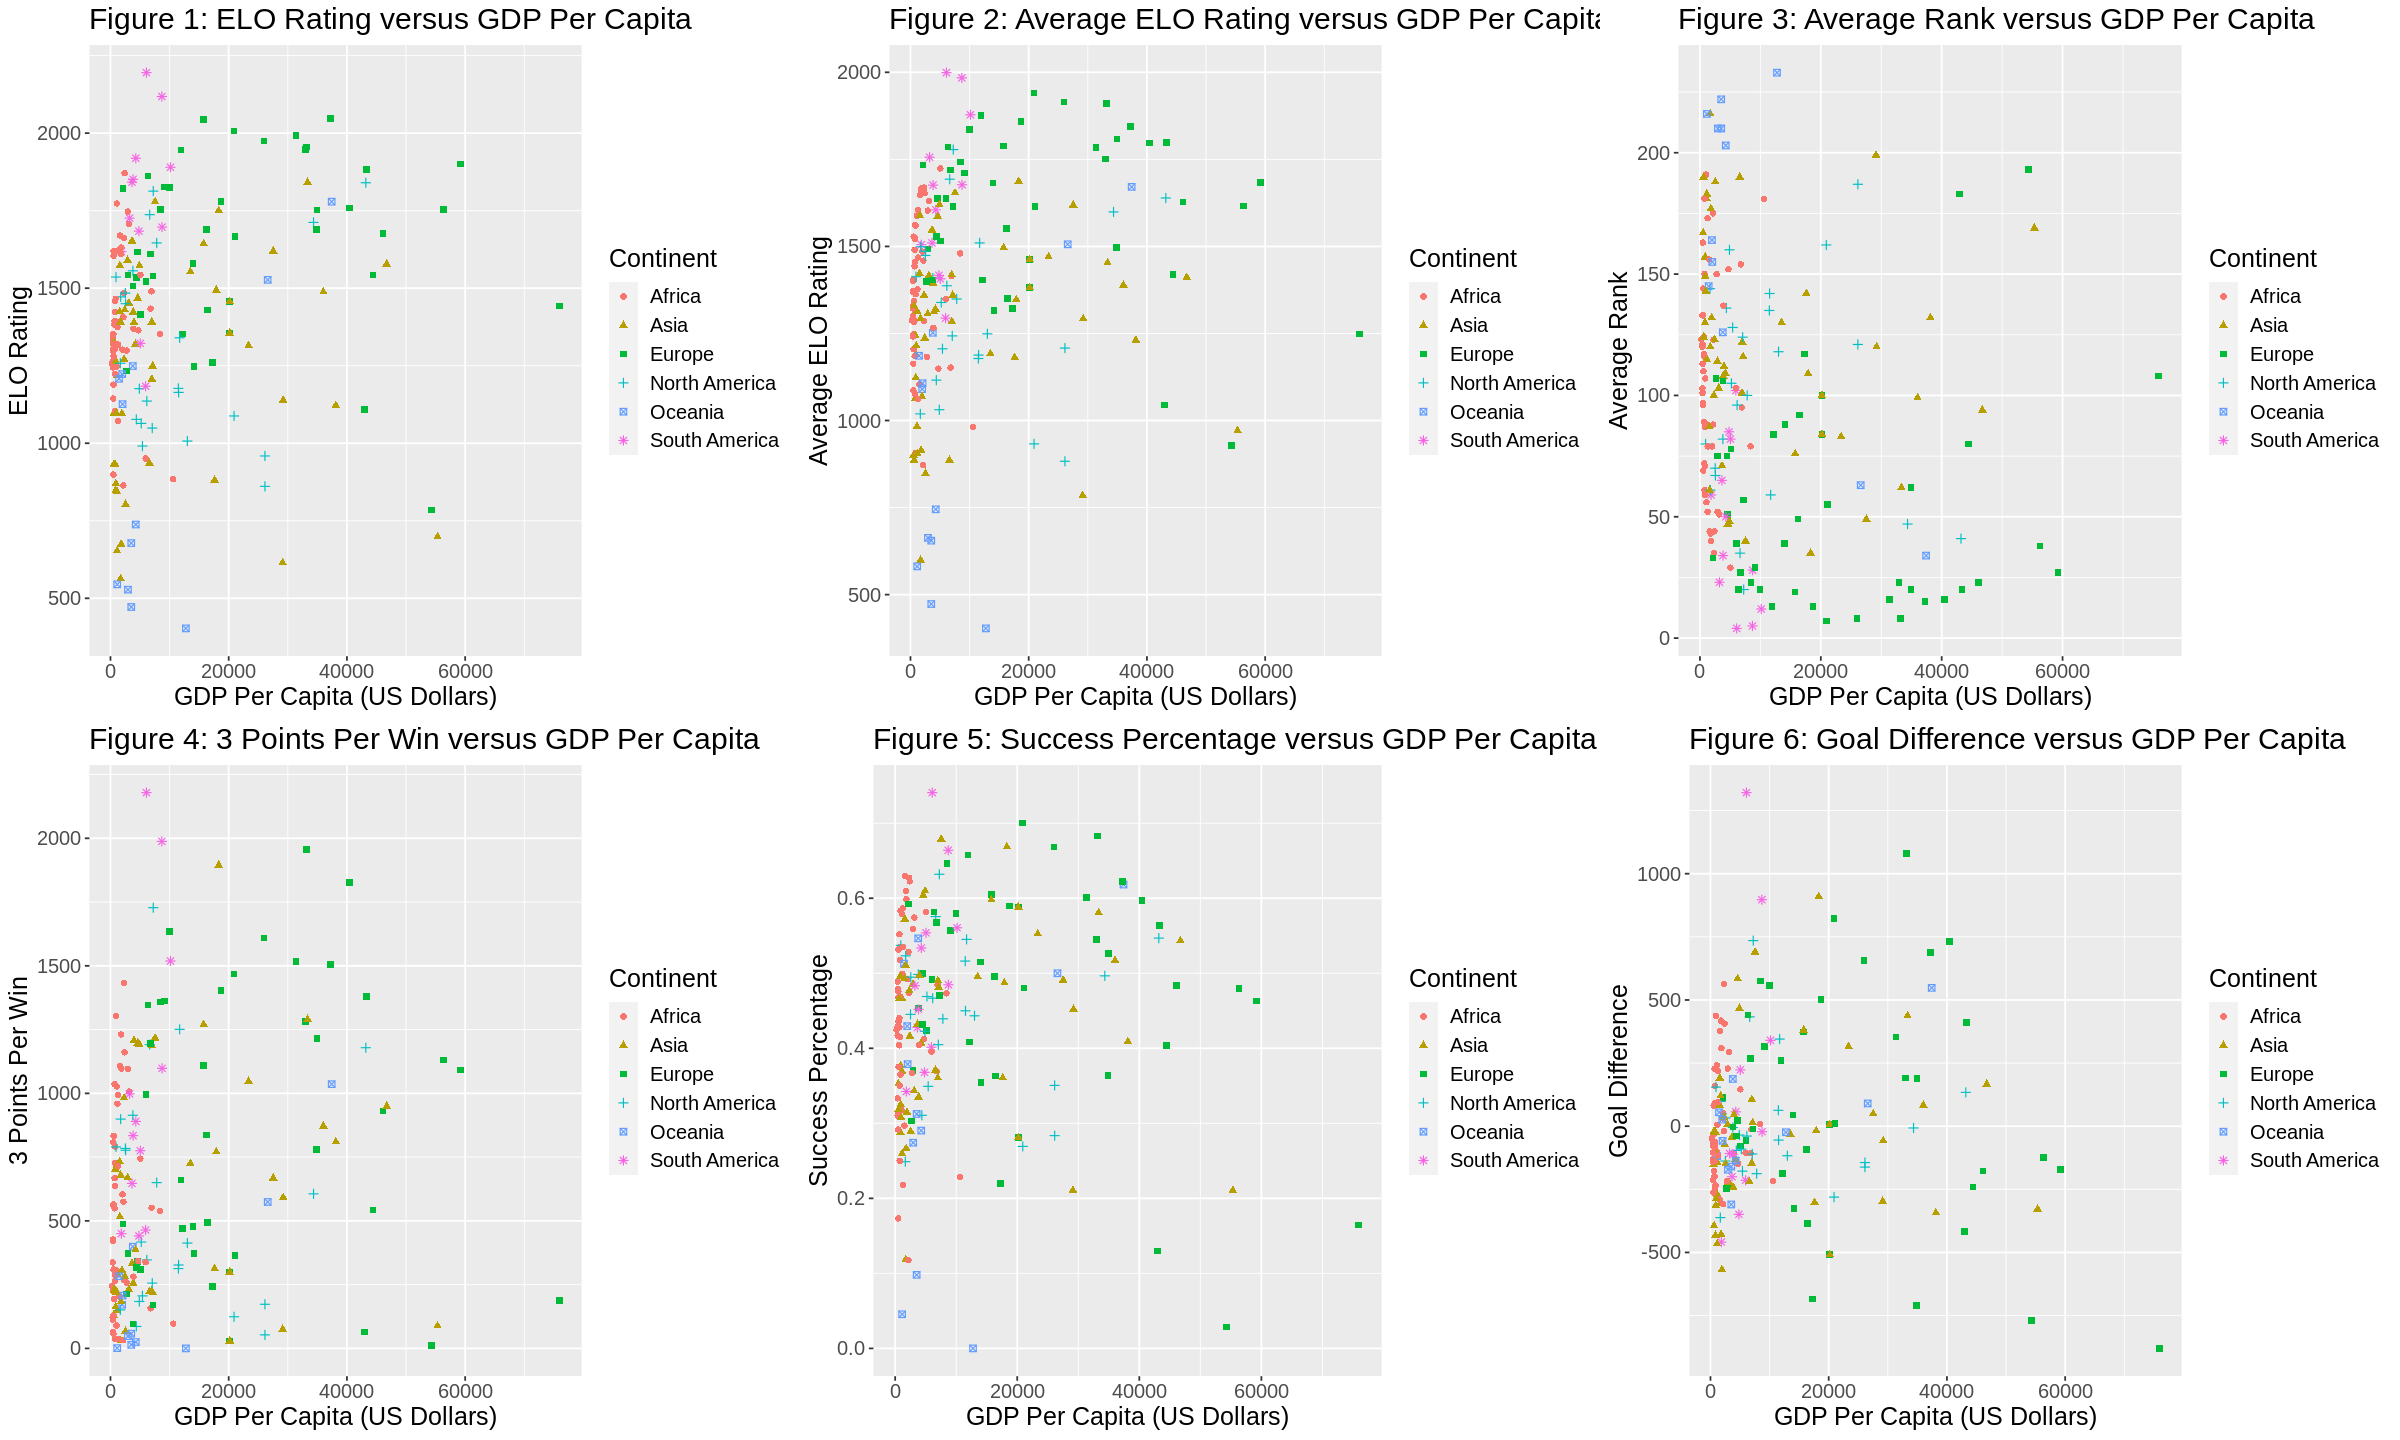

In [11]:
# By ggpairs, we can determine the relationship between all the variables from soccer_data_combined.
options(repr.plot.width = 20, repr.plot.height = 12)

# Graphing average_rating versus Mean_GDP_Capita
rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "ELO Rating") +
    ggtitle("Figure 1: ELO Rating versus GDP Per Capita") +
    theme(text = element_text(size = 15))

# Graphing average_rating versus Mean_GDP_Capita
avg_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Average ELO Rating") +
    ggtitle("Figure 2: Average ELO Rating versus GDP Per Capita") +
    theme(text = element_text(size = 15))

# Graphing average_rank versus Mean_GDP_Capita
avg_rank_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = average_rank, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Average Rank") +
    ggtitle("Figure 3: Average Rank versus GDP Per Capita") +
    theme(text = element_text(size = 15))

# Graphing points_per_3 versus Mean_GDP_Capita
point3_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = points_per_3, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "3 Points Per Win") +
    ggtitle("Figure 4: 3 Points Per Win versus GDP Per Capita") +
    theme(text = element_text(size = 15))

# Graphing success_percentage versus Mean_GDP_Capita
success_percentage_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = success_percentage, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Success Percentage") +
    ggtitle("Figure 5: Success Percentage versus GDP Per Capita") +
    theme(text = element_text(size = 15))

# Graphing goal_difference versus Mean_GDP_Capita
goal_difference_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = goal_difference, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Per Capita (US Dollars)", y = "Goal Difference") +
    ggtitle("Figure 6: Goal Difference versus GDP Per Capita") +
    theme(text = element_text(size = 15))


# Plotting all the graphs for GDP data vs ALL potential success variables
plot_grid(rating_plot, avg_rating_plot, avg_rank_plot, point3_plot, success_percentage_plot, goal_difference_plot)

At first, it may seem like no graphs have any relationship from `Figure 1-6`. However, many graphs have an observable logarithmic relationship between the GDP per Capita and the success variable. This is most clear for the ELO Rating, Average ELO Rating, and Success Percentage. The logarithmic relationship is the strongest for the average ELO rating.

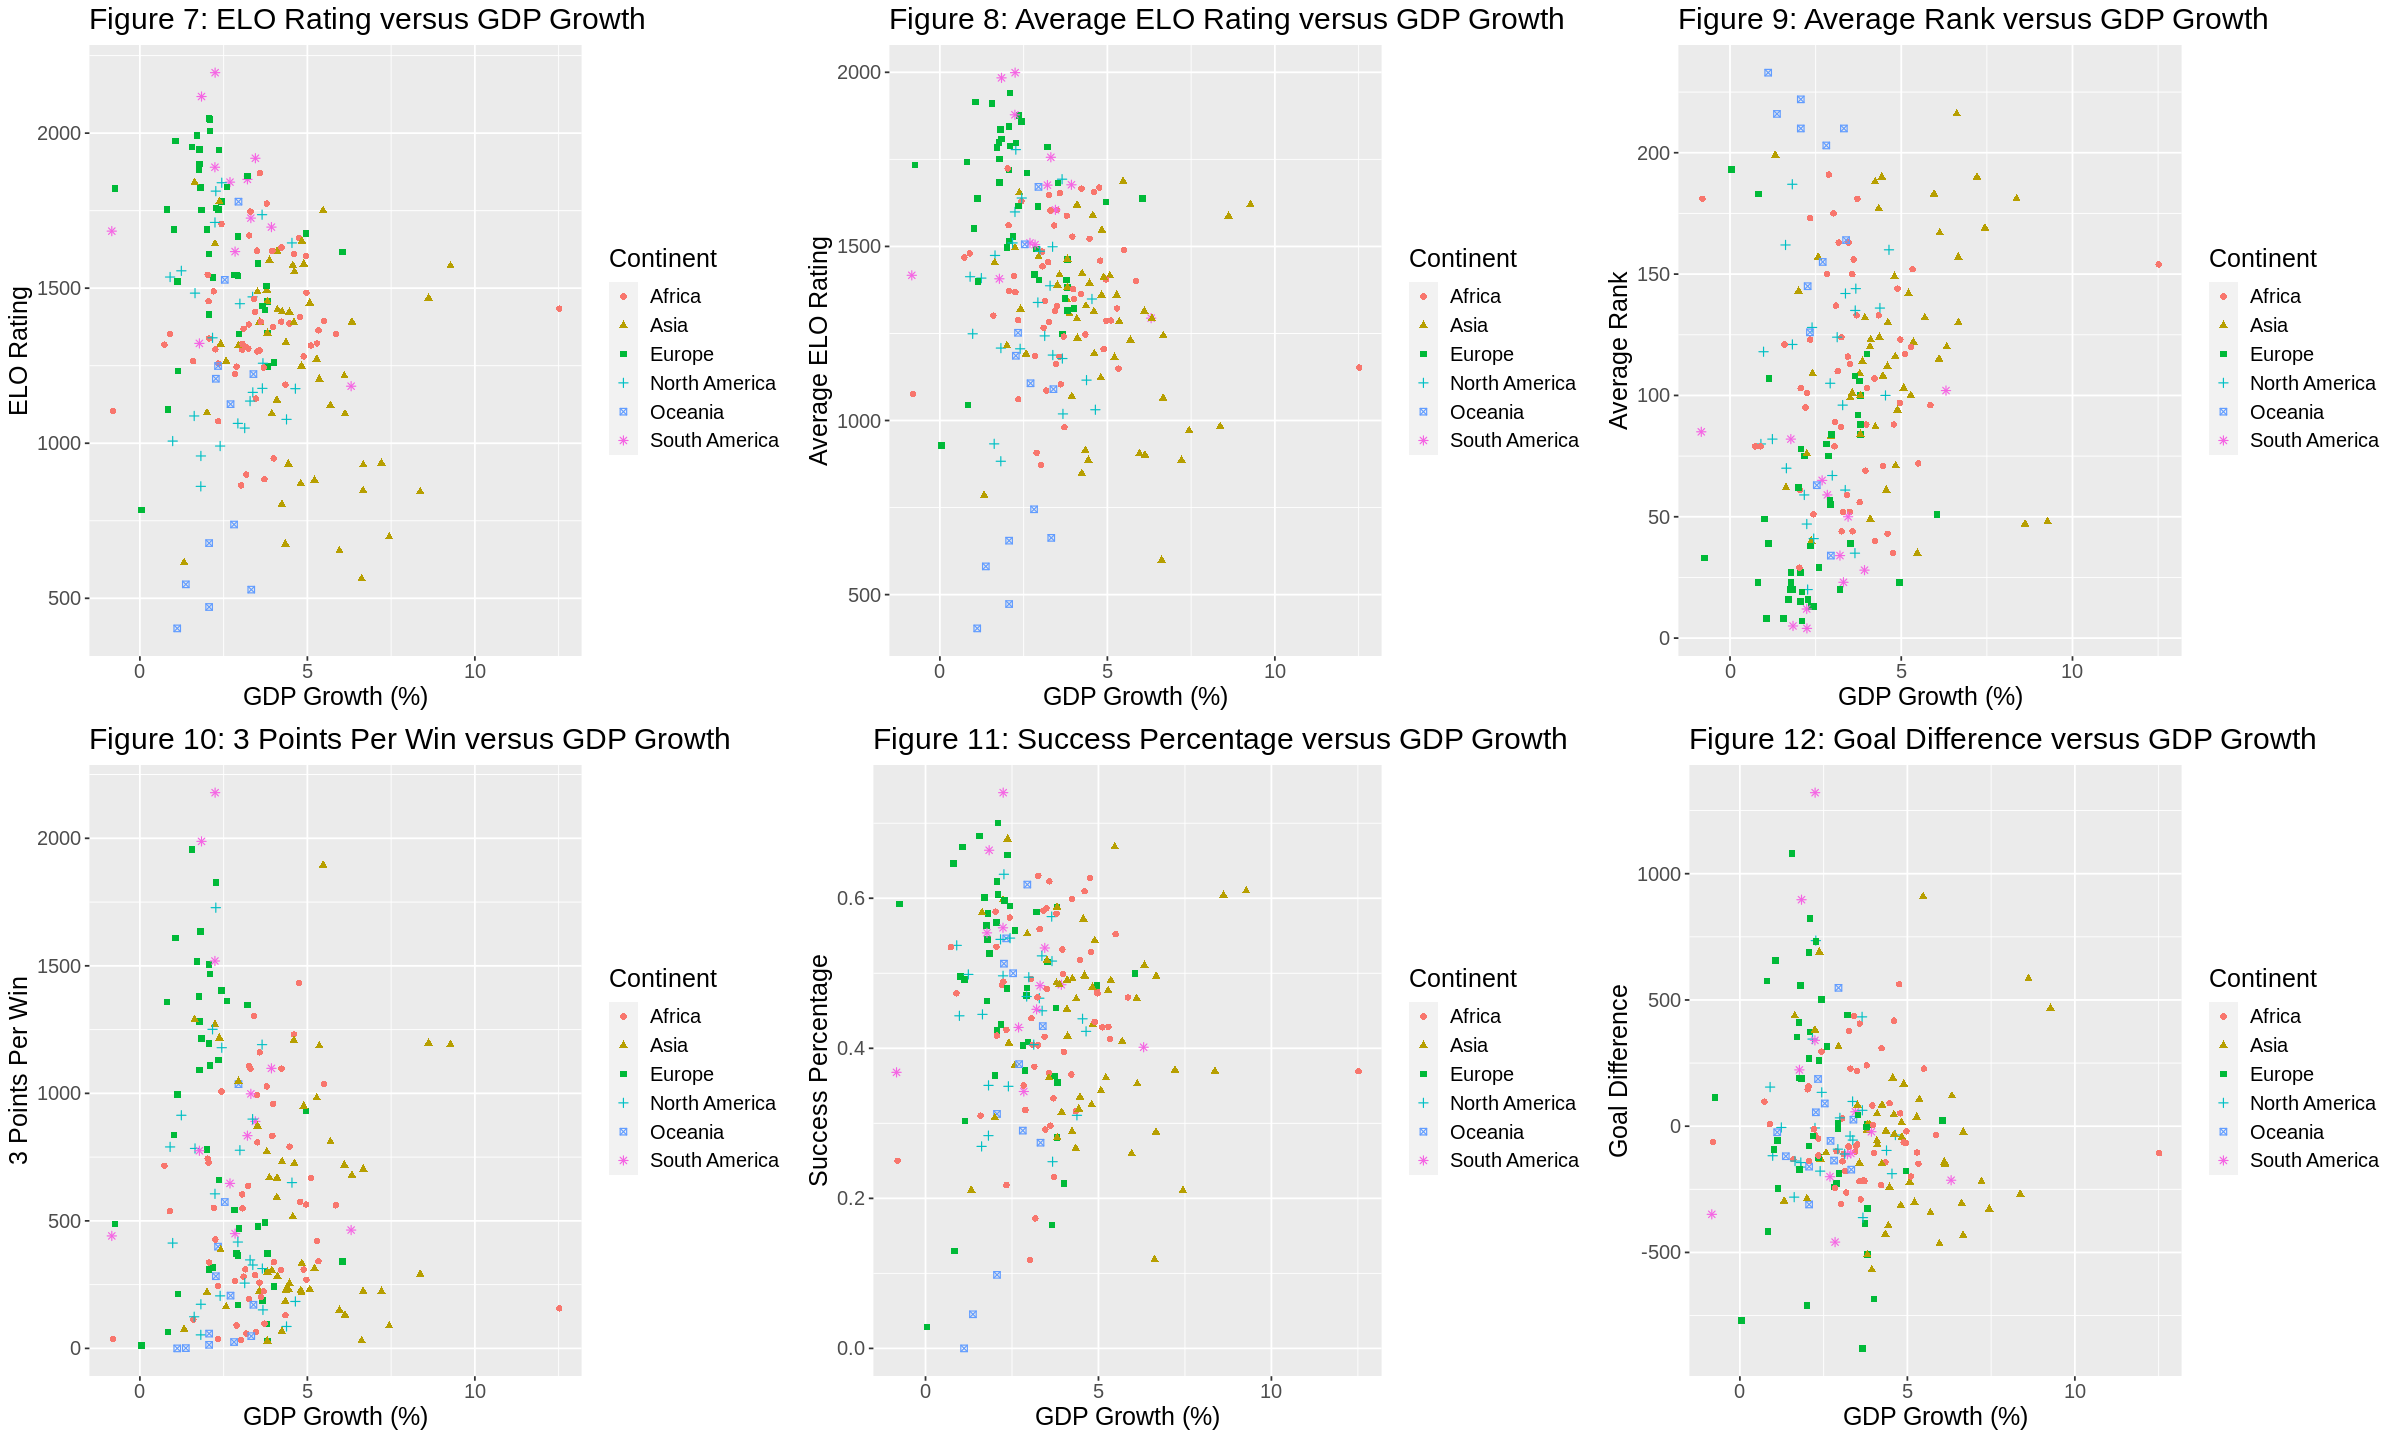

In [12]:
# By ggpairs, we can determine the relationship between all the variables from soccer_data_combined.
options(repr.plot.width = 20, repr.plot.height = 12)

# Graphing average_rating versus Mean_GDP_Growth
growth_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "ELO Rating") +
    ggtitle("Figure 7: ELO Rating versus GDP Growth") +
    theme(text = element_text(size = 15))

# Graphing average_rating versus Mean_GDP_Growth
growth_avg_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Average ELO Rating") +
    ggtitle("Figure 8: Average ELO Rating versus GDP Growth") +
    theme(text = element_text(size = 15))

# Graphing average_rank versus Mean_GDP_Growth
growth_avg_rank_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = average_rank, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Average Rank") +
    ggtitle("Figure 9: Average Rank versus GDP Growth") +
    theme(text = element_text(size = 15))

# Graphing points_per_3 versus Mean_GDP_Growth
growth_point3_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = points_per_3, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "3 Points Per Win") +
    ggtitle("Figure 10: 3 Points Per Win versus GDP Growth") +
    theme(text = element_text(size = 15))

# Graphing success_percentage versus Mean_GDP_Growth
growth_success_percentage_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = success_percentage, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Success Percentage") +
    ggtitle("Figure 11: Success Percentage versus GDP Growth") +
    theme(text = element_text(size = 15))

# Graphing goal_difference versus Mean_GDP_Growth
growth_goal_difference_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = goal_difference, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Goal Difference") +
    ggtitle("Figure 12: Goal Difference versus GDP Growth") +
    theme(text = element_text(size = 15))

# Plotting all the graphs for GDP data vs ALL potential success variablesd
plot_grid(growth_rating_plot, growth_avg_rating_plot, growth_avg_rank_plot, growth_point3_plot, growth_success_percentage_plot, growth_goal_difference_plot)

There seems to be very little relationship between the GDP Growth and the potential success variables. Data points seems to be randomly distributed given the same GDP Growth. There may be some correlation from the GDP Growth and ELO Rating in `Figure 7` for classifying continents. In this figure, sections of data points for Oceania and Asia are separate from other continents.

Due to the purpose of our report, we will be omitting the GDP Growth as it was no clear relationship for our regression.

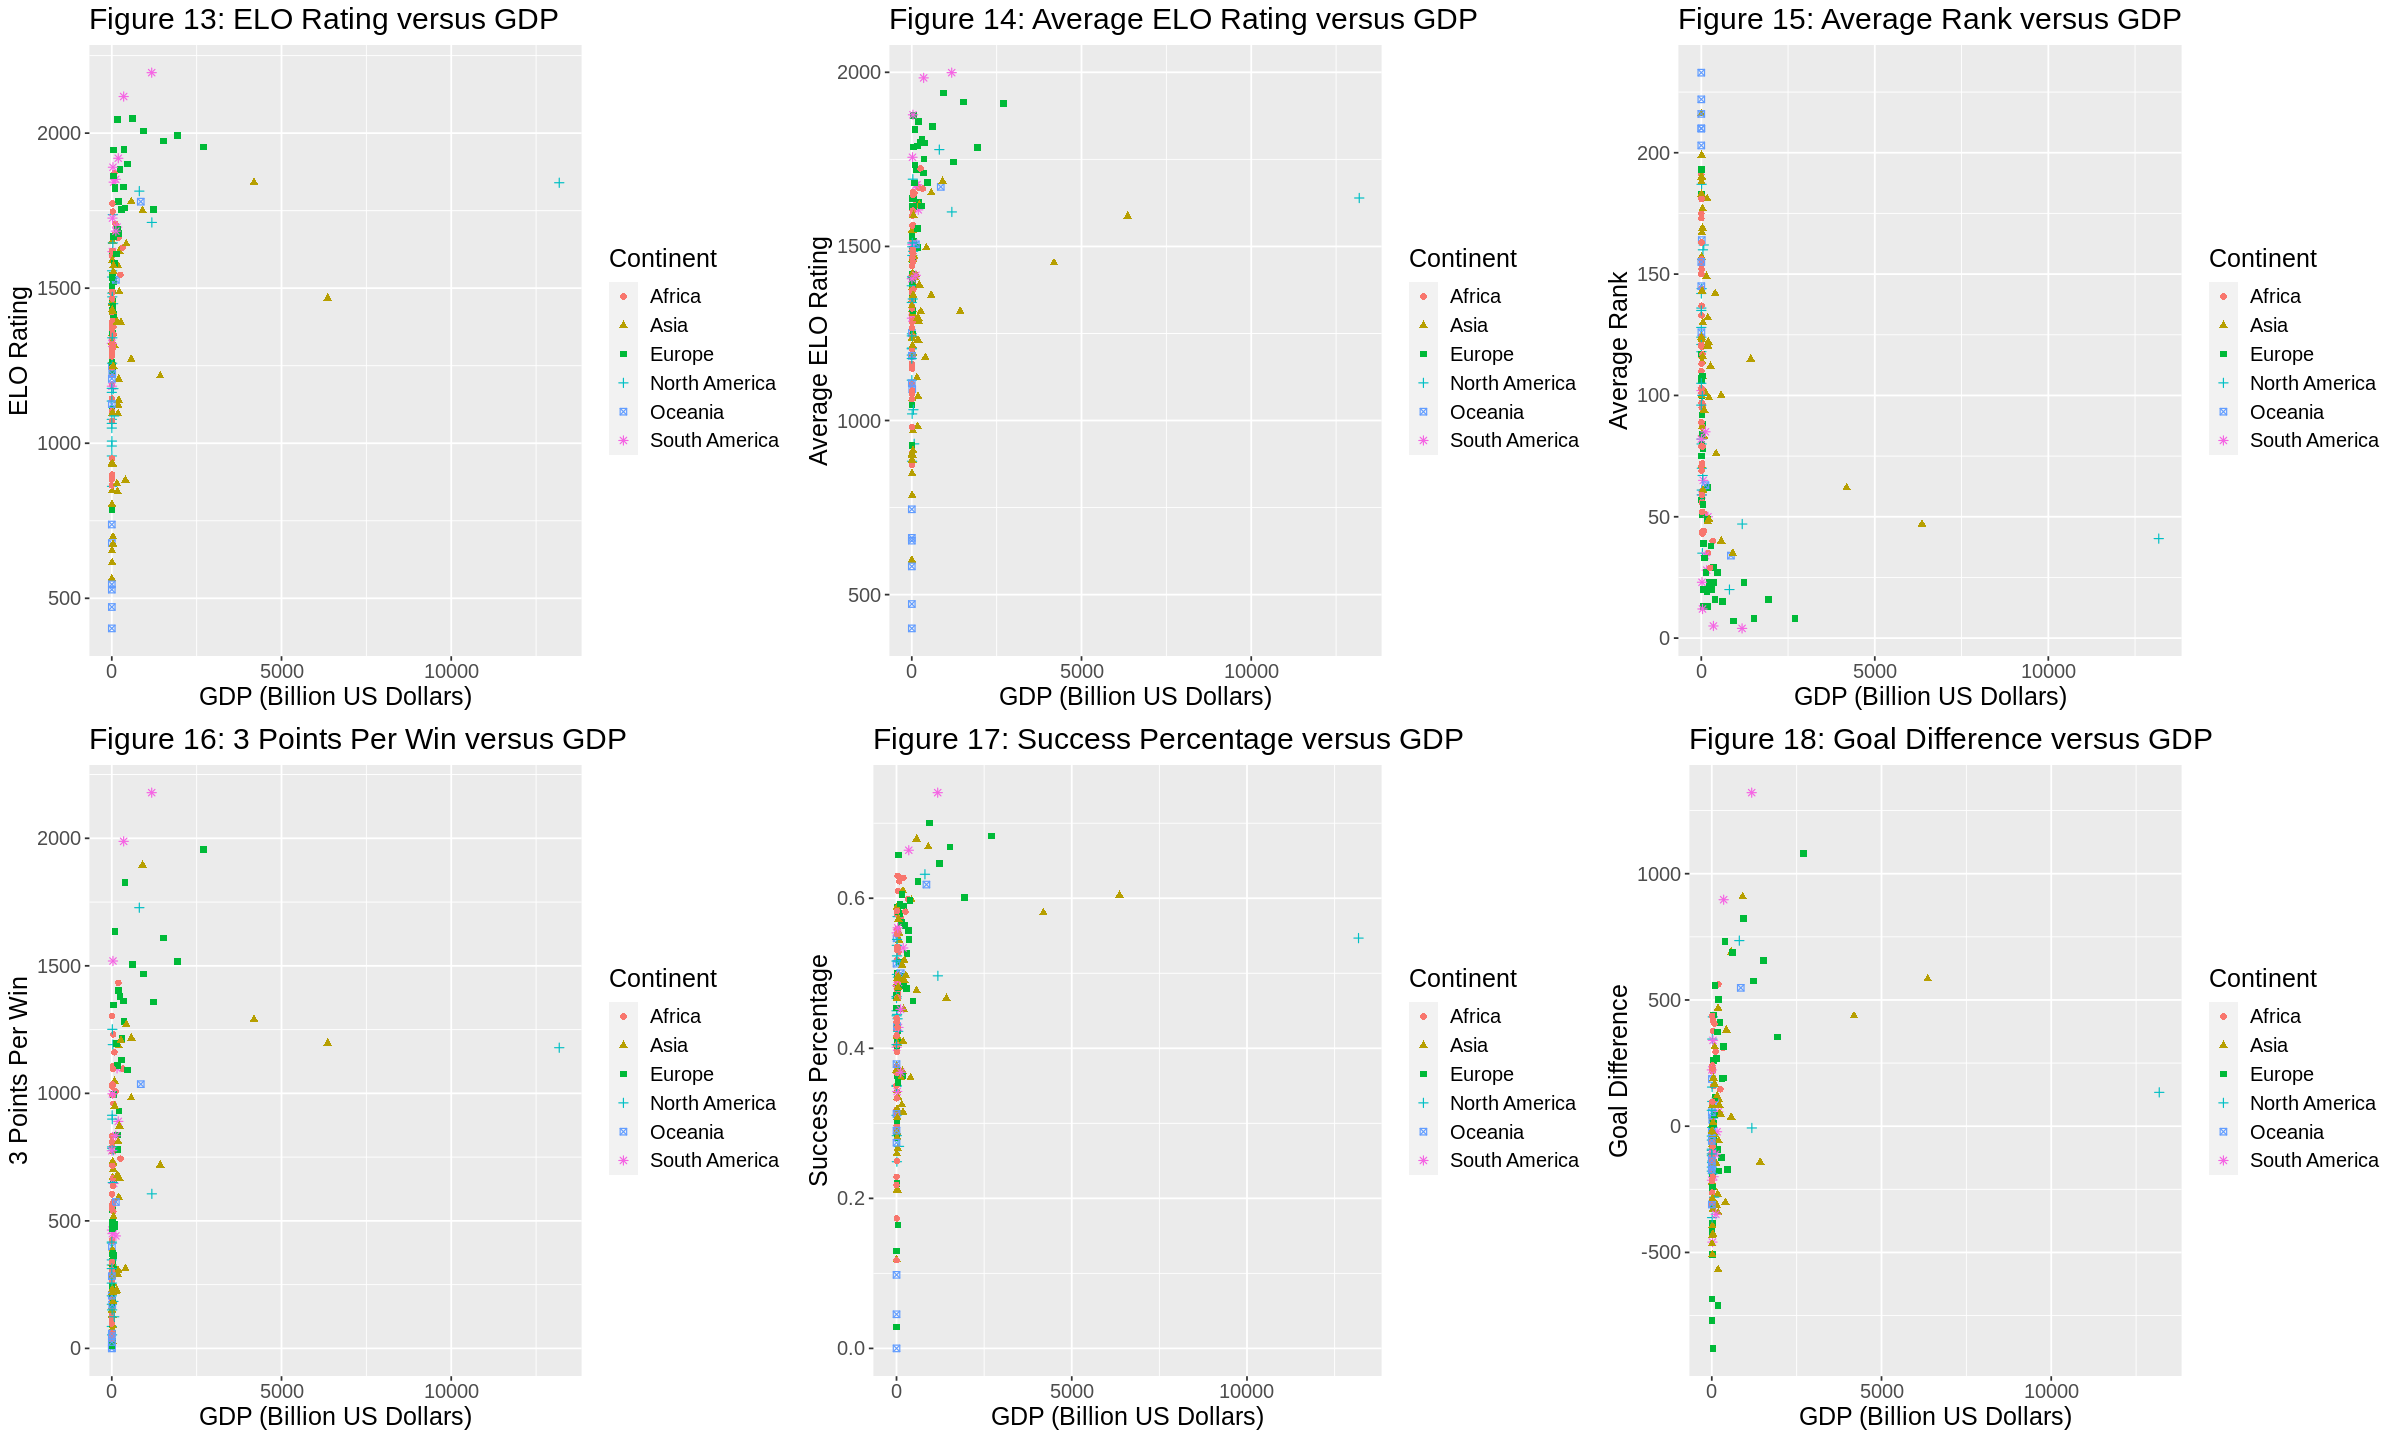

In [13]:
# By ggpairs, we can determine the relationship between all the variables from soccer_data_combined.
options(repr.plot.width = 20, repr.plot.height = 12)

# Graphing average_rating versus Mean_GDP
gdp_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP (Billion US Dollars)", y = "ELO Rating") +
    ggtitle("Figure 13: ELO Rating versus GDP") +
    theme(text = element_text(size = 15))

# Graphing average_rating versus Mean_GDP
gdp_avg_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP (Billion US Dollars)", y = "Average ELO Rating") +
    ggtitle("Figure 14: Average ELO Rating versus GDP") +
    theme(text = element_text(size = 15))

# Graphing average_rank versus Mean_GDP
gdp_avg_rank_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = average_rank, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP (Billion US Dollars)", y = "Average Rank") +
    ggtitle("Figure 15: Average Rank versus GDP") +
    theme(text = element_text(size = 15))

# Graphing points_per_3 versus Mean_GDP
gdp_point3_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = points_per_3, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP (Billion US Dollars)", y = "3 Points Per Win") +
    ggtitle("Figure 16: 3 Points Per Win versus GDP") +
    theme(text = element_text(size = 15))

# Graphing success_percentage versus Mean_GDP
gdp_success_percentage_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = success_percentage, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP (Billion US Dollars)", y = "Success Percentage") +
    ggtitle("Figure 17: Success Percentage versus GDP") +
    theme(text = element_text(size = 15))

# Graphing goal_difference versus Mean_GDP
gdp_goal_difference_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = goal_difference, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP (Billion US Dollars)", y = "Goal Difference") +
    ggtitle("Figure 18: Goal Difference versus GDP") +
    theme(text = element_text(size = 15))

# Plotting all the graphs for GDP data vs ALL potential success variables
plot_grid(gdp_rating_plot, gdp_avg_rating_plot, gdp_avg_rank_plot, gdp_point3_plot, gdp_success_percentage_plot, gdp_goal_difference_plot)

The relationship between the soccer statistics and the total GDP is less spread out as the GDP Per Capita graphs, with most of the plot points being flush to point 0 on the y axis across all figures. The ELO Rating `Figure 13`, average ELO Rating `Figure 14`, and Success Percentage `Figure 17` have a clear strong positive logartihmic relationship. Although the scale of the x-axis is different, it is clear that there is a stronger correlation between the GDP and success indicator than with GDP Per Capita and GDP growth.

With support from the previous graphs, the report will use ELO ratings as the main success indicator.

As a result, the report will be focusing on total GDP of a country mainly for the regression.


### Logarithmically Scaling Graphs

To aid visualization, the ELO Rating and GDP data will be graphed with a scaled logarithmic x-axis. As a result, the scaled graphs will produce more linear models, which will help with understanding the results of the k-nn regression and linear regression that ensues:

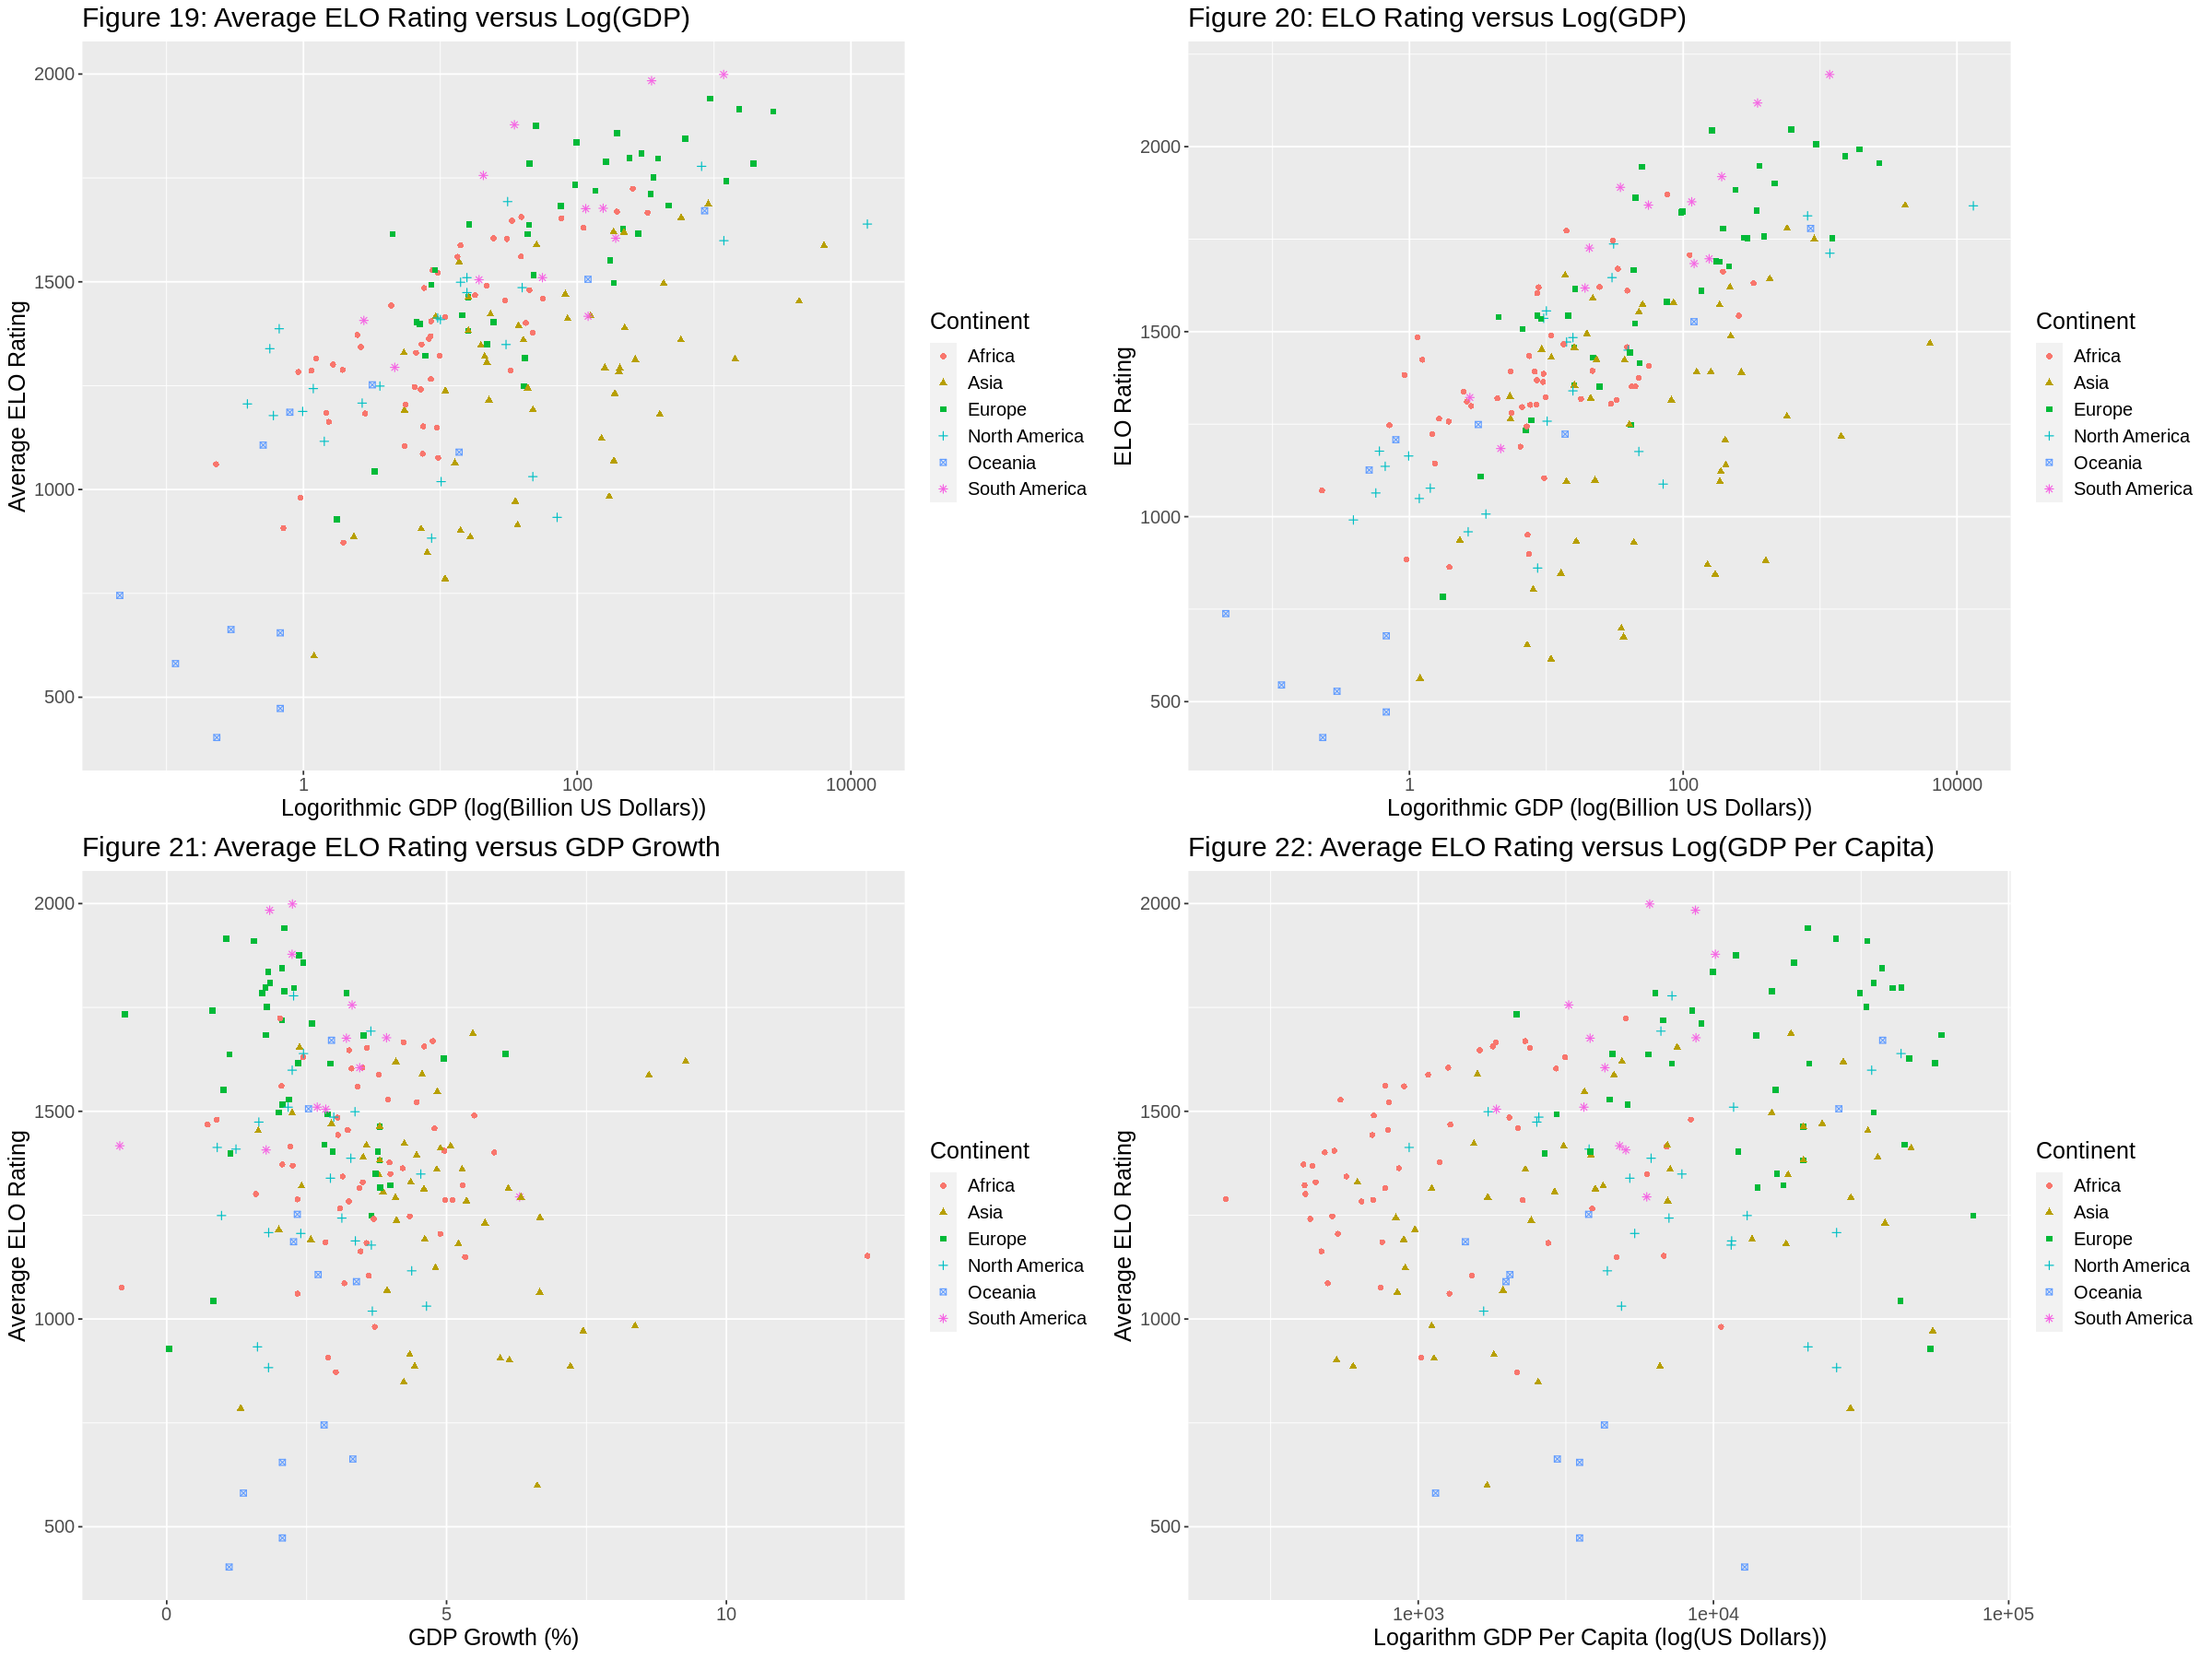

In [14]:
options(repr.plot.width = 20, repr.plot.height = 15)

# Comparing average_rating to Mean_GDP Logarithmically scaled
gdp_avg_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "Logorithmic GDP (log(Billion US Dollars))", y = "Average ELO Rating") +
    ggtitle("Figure 19: Average ELO Rating versus Log(GDP)") +
    theme(text = element_text(size = 15)) + 
    scale_x_continuous(trans = 'log10')

# Comparing rating to Mean_GDP Logarithmically scaled
gdp_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "Logorithmic GDP (log(Billion US Dollars))", y = "ELO Rating") +
    ggtitle("Figure 20: ELO Rating versus Log(GDP)") +
    theme(text = element_text(size = 15)) + 
    scale_x_continuous(trans = 'log10')

# GDP Growth with Points with Average ELO Rating 
gdp_growth_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Growth, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "GDP Growth (%)", y = "Average ELO Rating") +
    ggtitle("Figure 21: Average ELO Rating versus GDP Growth") +
    theme(text = element_text(size = 15))

# GDP Per Capita with Average ELO Rating Logarithmically scaled
gdp_capita_avg_rating_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP_Capita, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "Logarithm GDP Per Capita (log(US Dollars))", y = "Average ELO Rating") +
    ggtitle("Figure 22: Average ELO Rating versus Log(GDP Per Capita)") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(trans = 'log10')

# Plotting all the graphs for ELO vs GDP data
plot_grid(gdp_avg_rating_plot, gdp_rating_plot, gdp_growth_plot, gdp_capita_avg_rating_plot)

From `Figure 19`, it can be observed that the average ELO rating of a country plotted against the mean of total GDP gives a weak positive relationship. Taking a closer look, we can see that Oceania makes up most of the points in the bottom left corner or the graph, while Europe seems to make up most of the upper end of the trend. 

By comparing the graph between average ELO rating `Figure 19` and ELO rating `Figure 20` as of December 2022, the average ELO rating gives a stronger positive linear relationship than the ELO rating when plotted against the same x axis.

It is clear that there is no relationship when GDP growth % is plotted on the x axis `Figure 21`. Again, Oceania is generally at the bottom of the graph for lower ELO ratings, whereas Europe is mostly huddled together at the top of the y axis. Overall, the points do not seem to have any discernable pattern. 

We can see here that there is no relationship between GDP per capita and ELO ratings `Figure 22`, although it can be argued that there is a slight increase. There is a fairly dispersed distribution of the points with certain continents (like Africa and Europe) can be seen sticking together in about the same areas. There is no obvious trend between the two variables.

Since the continents seem to have an influence on the distributions, the average ELO Rating and GDP is graphed again but separated based on continents:

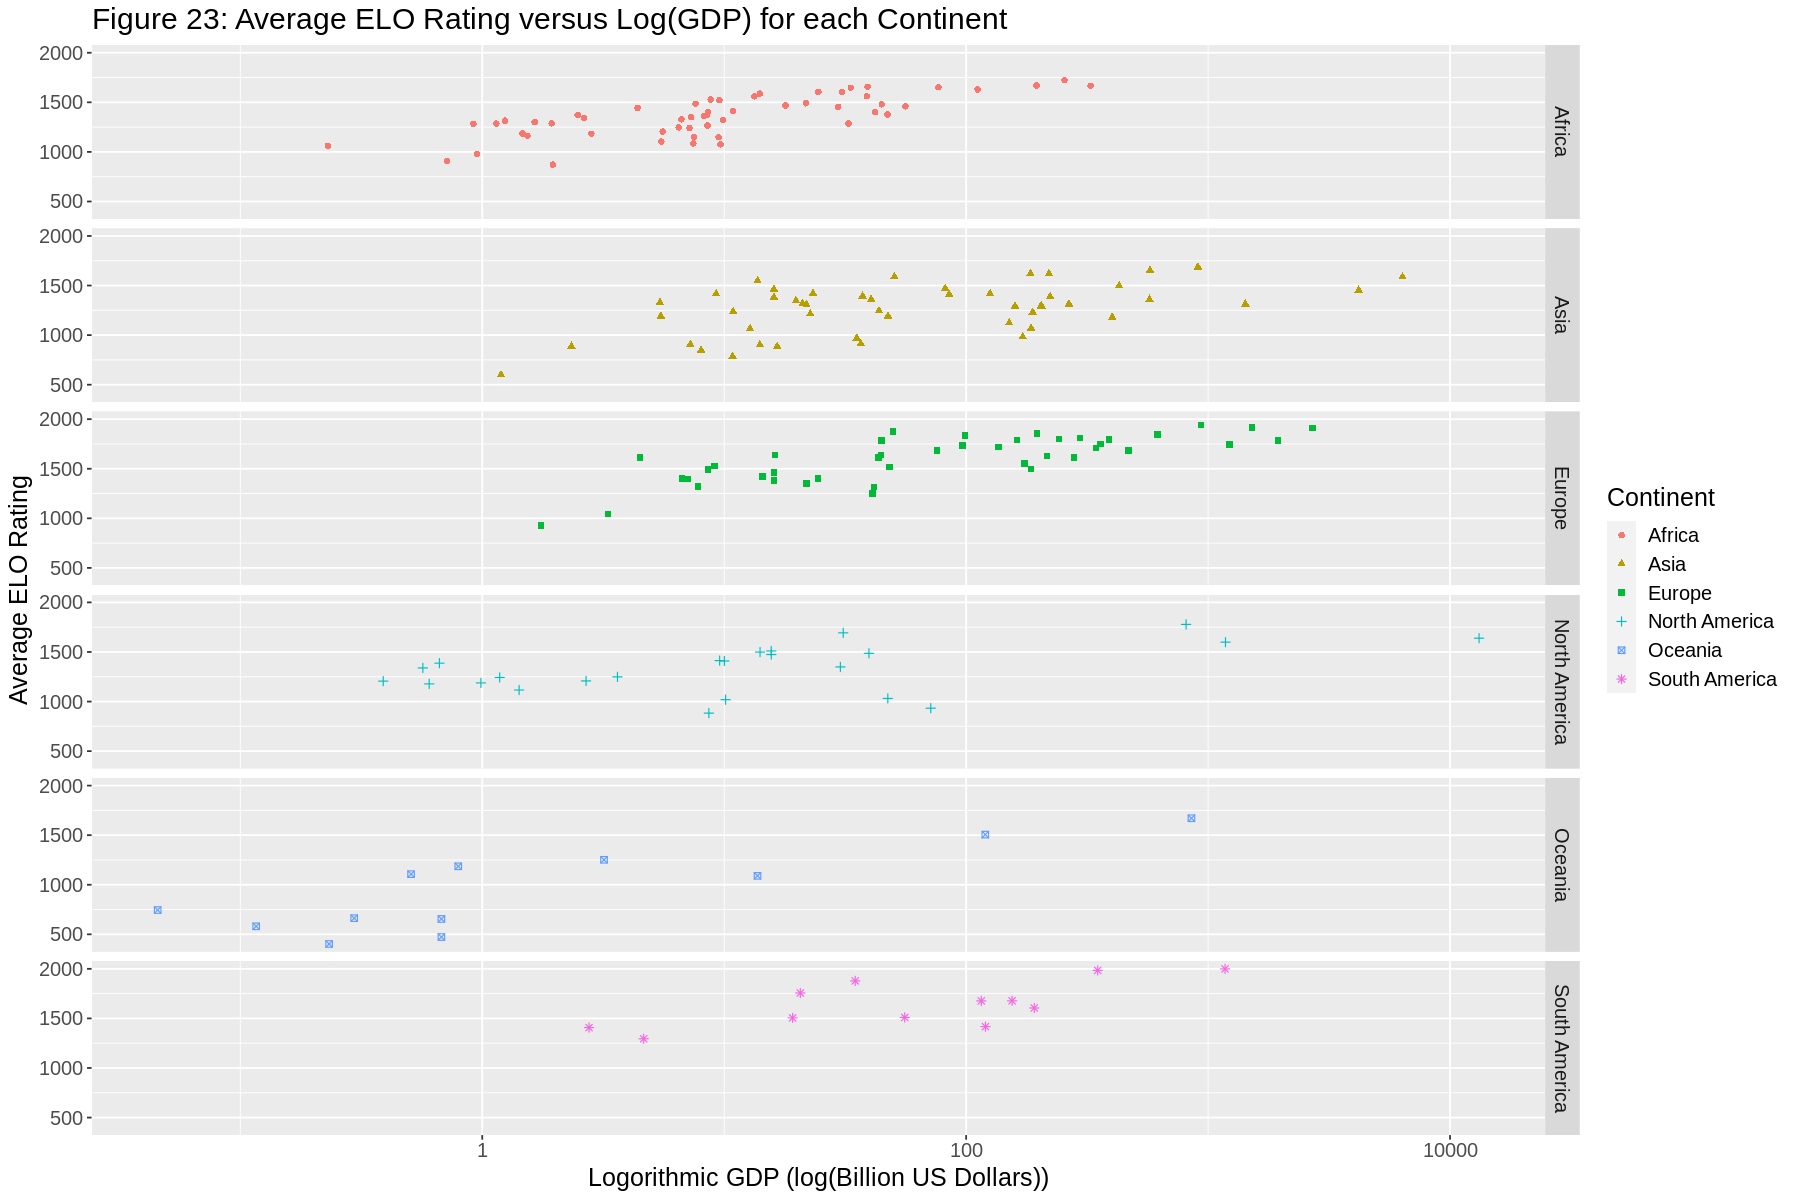

In [15]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Comparing average_rating to Mean_GDP Logarithmically scaled within Continents
gdp_avg_rating_continent_plot <- ggplot(soccer_data_wrangled, aes(x = Mean_GDP, y = average_rating, color = Continent, shape = Continent)) + 
    geom_point() +
    labs(x = "Logorithmic GDP (log(Billion US Dollars))", y = "Average ELO Rating") +
    ggtitle("Figure 23: Average ELO Rating versus Log(GDP) for each Continent") +
    theme(text = element_text(size = 15)) + 
    scale_x_continuous(trans = 'log10') +
    facet_grid(rows = vars(Continent))

gdp_avg_rating_continent_plot

From `Figure 23`, it is true that the linear positive relationship is strongest with Africa, Asian, South America, and Europe but is weaker for North America, and Oceania. It would be wise to perform regression on each continent. However, due to the small data set size for each continent, the regression is best performed for the whole world.

## 5. Regression on Dataset <a name="regression"></a>

As both the average ELO Rating and the GDP are quantitative variables, two regressions will be used to determine the relationship between the two variables. The response variable that will be used is the average ELO rating, as determined from previous sections.

First, we will be performing a k-nn regression to predict the average ELO rating given the GDP. It would also be reasonable to include the GDP Per Capita as a predictor variable too, as we believe that using more predictor varibles will increase the accuracy of our models. We will be manipulating the GDP Per Capita and GDP with the logarithm function, as shown in `Table 10` below.

Then, a linear regression will be performed on the strongest linear relationship, which is between the average ELO rating and the total GDP.

The RMSPE of the two regressions will be determined and compared with each other. The better of the two regressions will be selected as our final predictor for the report.

In [16]:
# Creating a new table which contains the log of the GDP Per Capita and GDP as well as eliminate other variables
soccer_data_reg <- soccer_data_wrangled |>
    mutate(log_Mean_GDP_Capita = log(Mean_GDP_Capita),
          log_Mean_GDP = log(Mean_GDP)) |>
    select(Country, Continent, log_Mean_GDP_Capita, log_Mean_GDP, average_rating)

soccer_data_reg

Country,Continent,log_Mean_GDP_Capita,log_Mean_GDP,average_rating
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,6.270647,2.641850,901
Albania,Europe,7.987976,2.148433,1493
Algeria,Africa,8.053877,4.714172,1630
⋮,⋮,⋮,⋮,⋮
Yemen,Asia,6.882190,3.121985,1215
Zambia,Africa,6.796692,2.590312,1560
Zimbabwe,Africa,7.158483,2.886211,1468


`Table 10`

### Performing KNN Regression on Log GDP, Log(GDP Per Capita) against Average Rating

First, we will be splitting our data to our training and testing data with a 0.75 split. The response variable will be the average rating.

In [17]:
# Seperating Training and Testing Data to a 0.75:0.25 split
set.seed(2022)
soccer_split <- initial_split(soccer_data_reg, prop = 0.75, strata = average_rating)
soccer_training <- training(soccer_split)
soccer_testing <- testing(soccer_split)

Then, we will be performing a k-nn regression on the Log GDP, Log GDP Per Capita, and Average Rating. A 5-fold cross validation will be performed with 100 possible k-values. The KNN regression will be tuned, then returned the k-value that yields the minimum RMSE value from the training data.

In [18]:
set.seed(2022)

# Creating the knn model that tunes the regression
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |>
    set_mode("regression")

# Developing the soccer recipe, which includes the log Mean GDP and GDP per Cpaita as the predictor variables. The predictors are centered and scaled.
soccer_recipe <- recipe(average_rating ~ log_Mean_GDP + log_Mean_GDP_Capita, data = soccer_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Determining the number of folds for the cross-validation performed on the KNN regression
soccer_vfold <- vfold_cv(soccer_training, v = 5, strata = log_Mean_GDP)

# Number of possible k-values for the regression
gridvals <- tibble(neighbors = seq(1,100))

# Creating the workflow with the recipe and model. Performing cross validation to obtain the k-value for the minimum RMSE value
soccer_results <- workflow() |>
    add_recipe(soccer_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = soccer_vfold, grid = gridvals) |>
    collect_metrics()

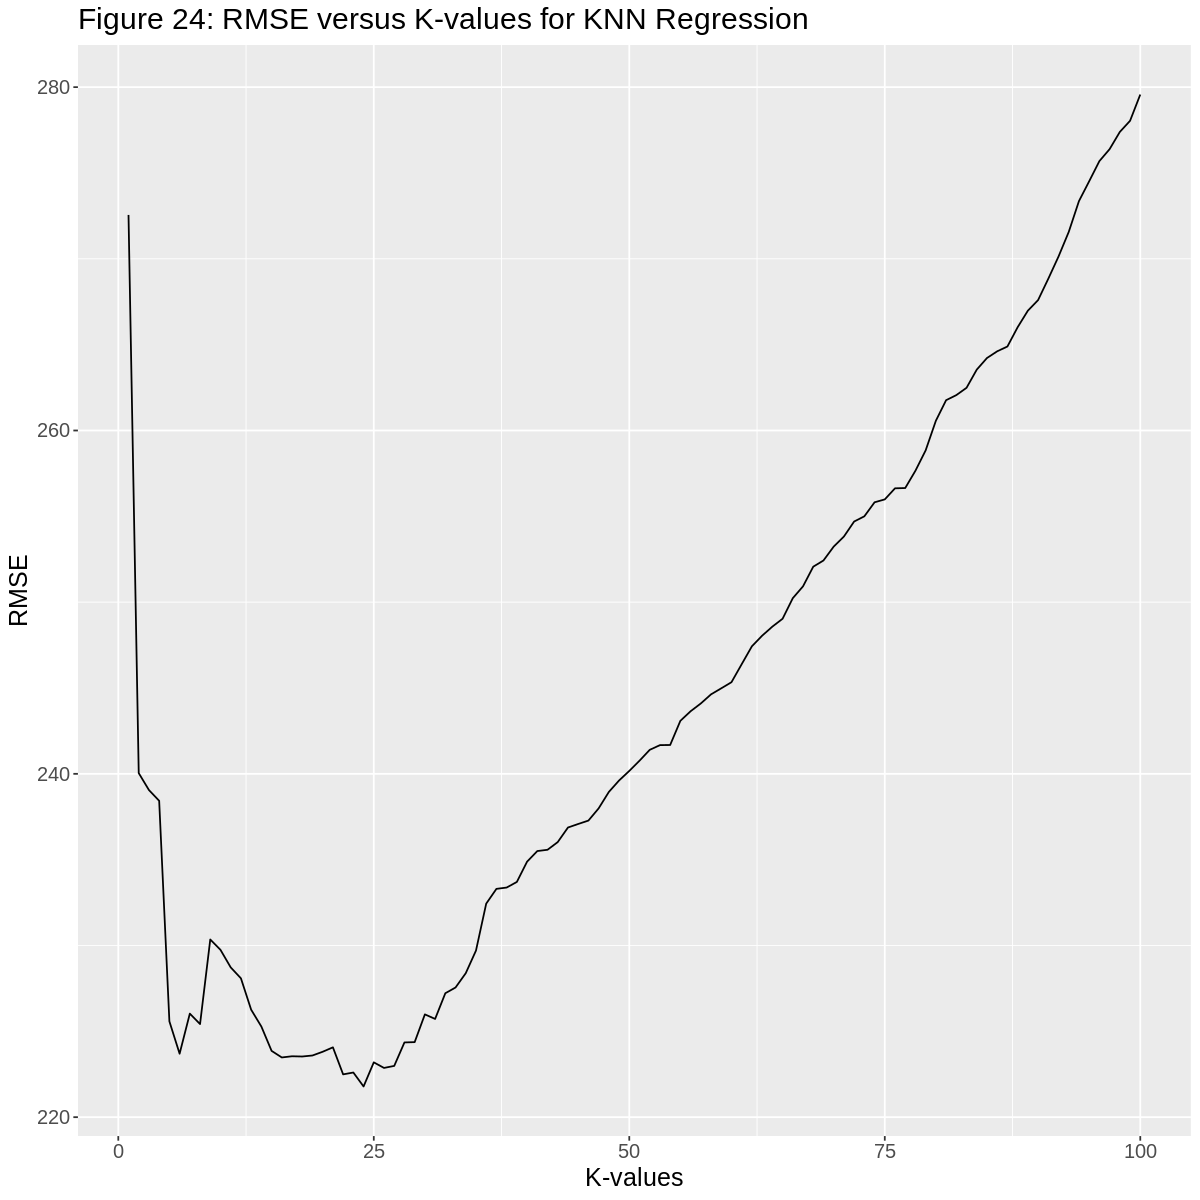

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)

# Graph distribution of the soccer_results to determine the k-value for the minimum RMSE value
soccer_results_graph <- soccer_results |>
    filter(.metric == "rmse") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    labs(x = "K-values", y = "RMSE") +
    ggtitle("Figure 24: RMSE versus K-values for KNN Regression") +
    theme(text = element_text(size = 15)) 

soccer_results_graph

In [20]:
soccer_min <- soccer_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    head(1)

soccer_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
24,rmse,standard,221.7864,5,20.09152,Preprocessor1_Model024


`Table 11`

From the `Figure 24` and `Table 11`, we can determine that the k-value that yields the minimum RMSE from a 5 fold cross validation is 24.

Thus, we will be using k = 24 for the KNN-regression to find the most optimal preditor between GDP and GDP Per Capita and average ELO Rating

In [21]:
set.seed(2022)

# Obtaining the k-value that yields the minimum RMSE (k = 24)
kmin <- soccer_min |>
    pull(neighbors)

# Creating the model for the KNN regression with k=24 neighbors
soccer_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
    set_engine("kknn") |>
    set_mode("regression")

# Developing the workflow and fit with the best spec and recipe on the training data
soccer_best_fit <- workflow() |>
    add_recipe(soccer_recipe) |>
    add_model(soccer_best_spec) |>
    fit(data = soccer_training)

# Testing the testing data set against the model to determine the rmspe of the model
soccer_summary <- soccer_best_fit |>
    predict(soccer_testing) |>
    bind_cols(soccer_testing) |>
    metrics(truth = average_rating, estimate = .pred)

soccer_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,237.9049143
rsq,standard,0.4883189
mae,standard,183.5653595


`Table 12`

The RMSPE of the testing data on the model developed by the training data is 237.9049143 from `Table 12`. Based on the scale of the average ELO rating, the RMSPE value is reasonable given the scale of the average ELO rating.

The graphs below will show the relationship between the predicted values of the KNN regression and each predictor variable:

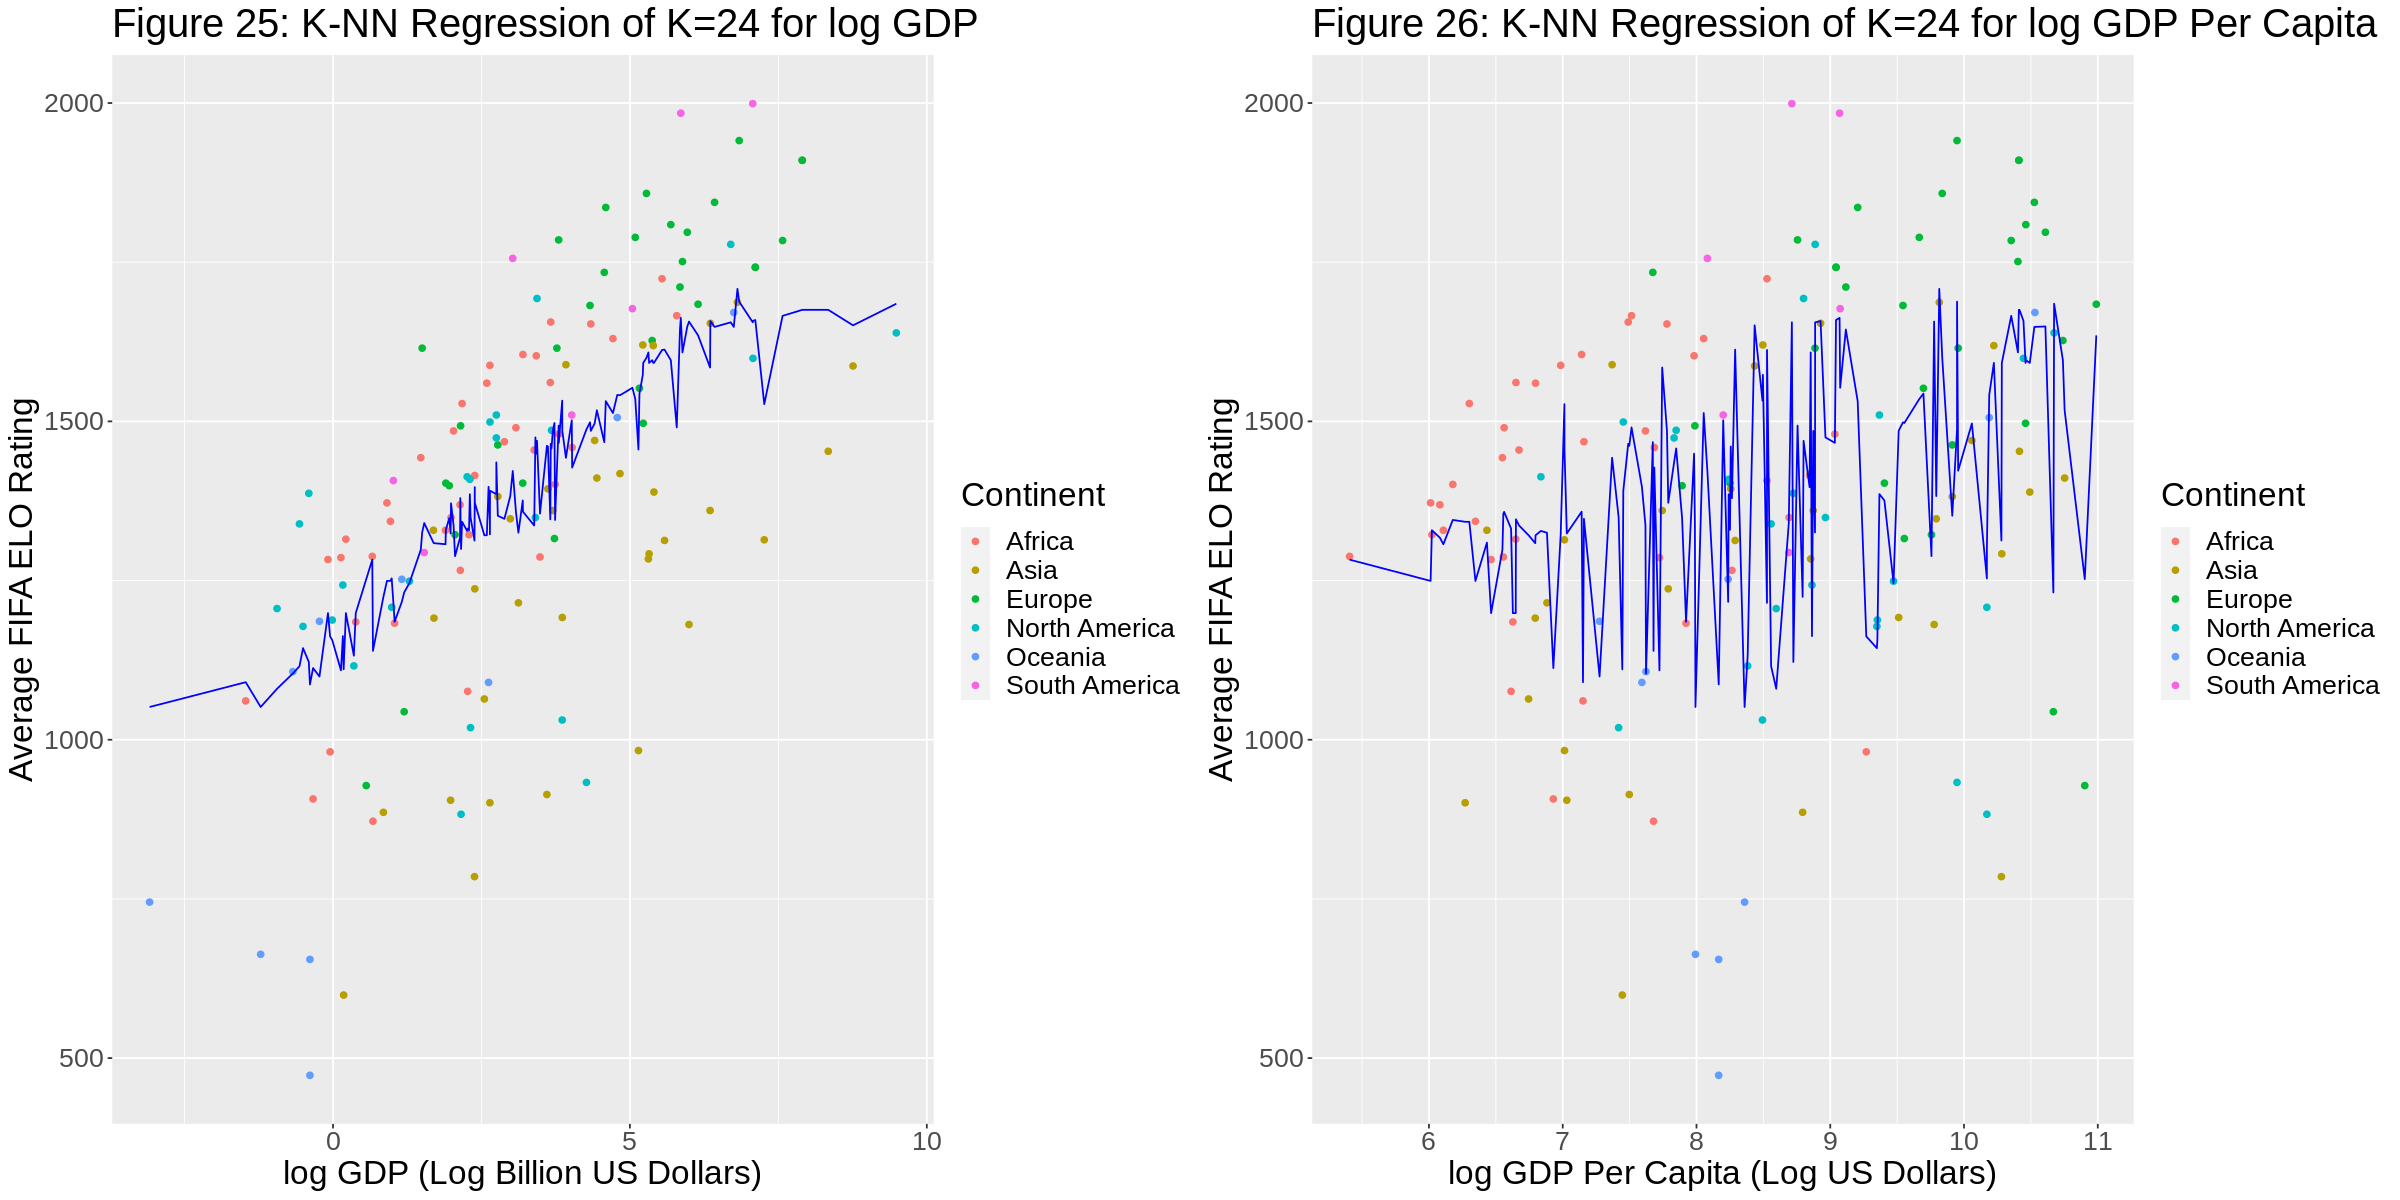

In [22]:
options(repr.plot.width = 20, repr.plot.height = 10)

# Combine the predicted values of the regression to the soccer training dataset
soccer_preds <- soccer_best_fit |>
    predict(soccer_training) |>
    bind_cols(soccer_training)

# Graph the plot between the log Mean GDP and average ELO rating
soccer_gdp_plot <- ggplot(soccer_preds, aes(x = log_Mean_GDP, y = average_rating, color = Continent)) +
    geom_point() +
    labs(x = "log GDP (Log Billion US Dollars)",
         y = "Average FIFA ELO Rating",
        color = "Continent") +
    geom_line(data = soccer_preds, aes(x = log_Mean_GDP, y = .pred), color = "blue") +
    ggtitle("Figure 25: K-NN Regression of K=24 for log GDP") +
    theme(text = element_text(size = 20))

# Graph the plot between the log Mean GDP Per Capita and average ELO rating
soccer_gdp_capita_plot <- ggplot(soccer_preds, aes(x = log_Mean_GDP_Capita, y = average_rating, color = Continent)) +
    geom_point() +
    labs(x = "log GDP Per Capita (Log US Dollars)",
         y = "Average FIFA ELO Rating",
        color = "Continent") +
    geom_line(data = soccer_preds, aes(x = log_Mean_GDP_Capita, y = .pred), color = "blue") +
    ggtitle("Figure 26: K-NN Regression of K=24 for log GDP Per Capita") +
    theme(text = element_text(size = 20))

plot_grid(soccer_gdp_plot, soccer_gdp_capita_plot)

From the KNN regression, it is clear that the model overfits the data, especially from the log GDP Per Capita graph `Figure 26`. This attests to the accuracy of the model. It is difficult to predict values given a GDP data. From the GDP graph, there is a noticable increase between log(GDP) and average rating `Figure 25`. However, the same relationship could not be said for the GDP Per Capita.

## Linear Regression on Log GDP and Average Rating

First, we will be splitting our data to our training and testing data with a 0.75 split. The response variable will be the average rating.

A linear regression will be performed on the logarithm Mean GDP and the average rating on the soccer training data.

In [23]:
set.seed(2022)

# Creating the model for the linear regression
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

# Creating the recipe for the linear regression with the predictor variable as the log(GDP) and the response variable as the average_rating
soccer_recipe <- recipe(average_rating ~ log_Mean_GDP, data = soccer_training)

# Creating workflow and fit for the recipe
soccer_fit <- workflow() |>
    add_recipe(soccer_recipe) |>
    add_model(lm_spec) |>
    fit(data = soccer_training)

soccer_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  log_Mean_GDP  
     1116.56         83.83  


From the linear regression performed above, the line of best fit through the training data is:

$83.83*$ `log_Mean_GDP` $+ 1116.56 = $ `average_rating`

Therefore, based on the previous variables:

$83.83*$ log(`GDP`) $+ 1116.56 = $ `average_rating`

In other words, there for every increase in the logarithm GDP, the average_rating of the model increases by 83.83.

Below is the visualization of the training data:

`geom_smooth()` using formula 'y ~ x'



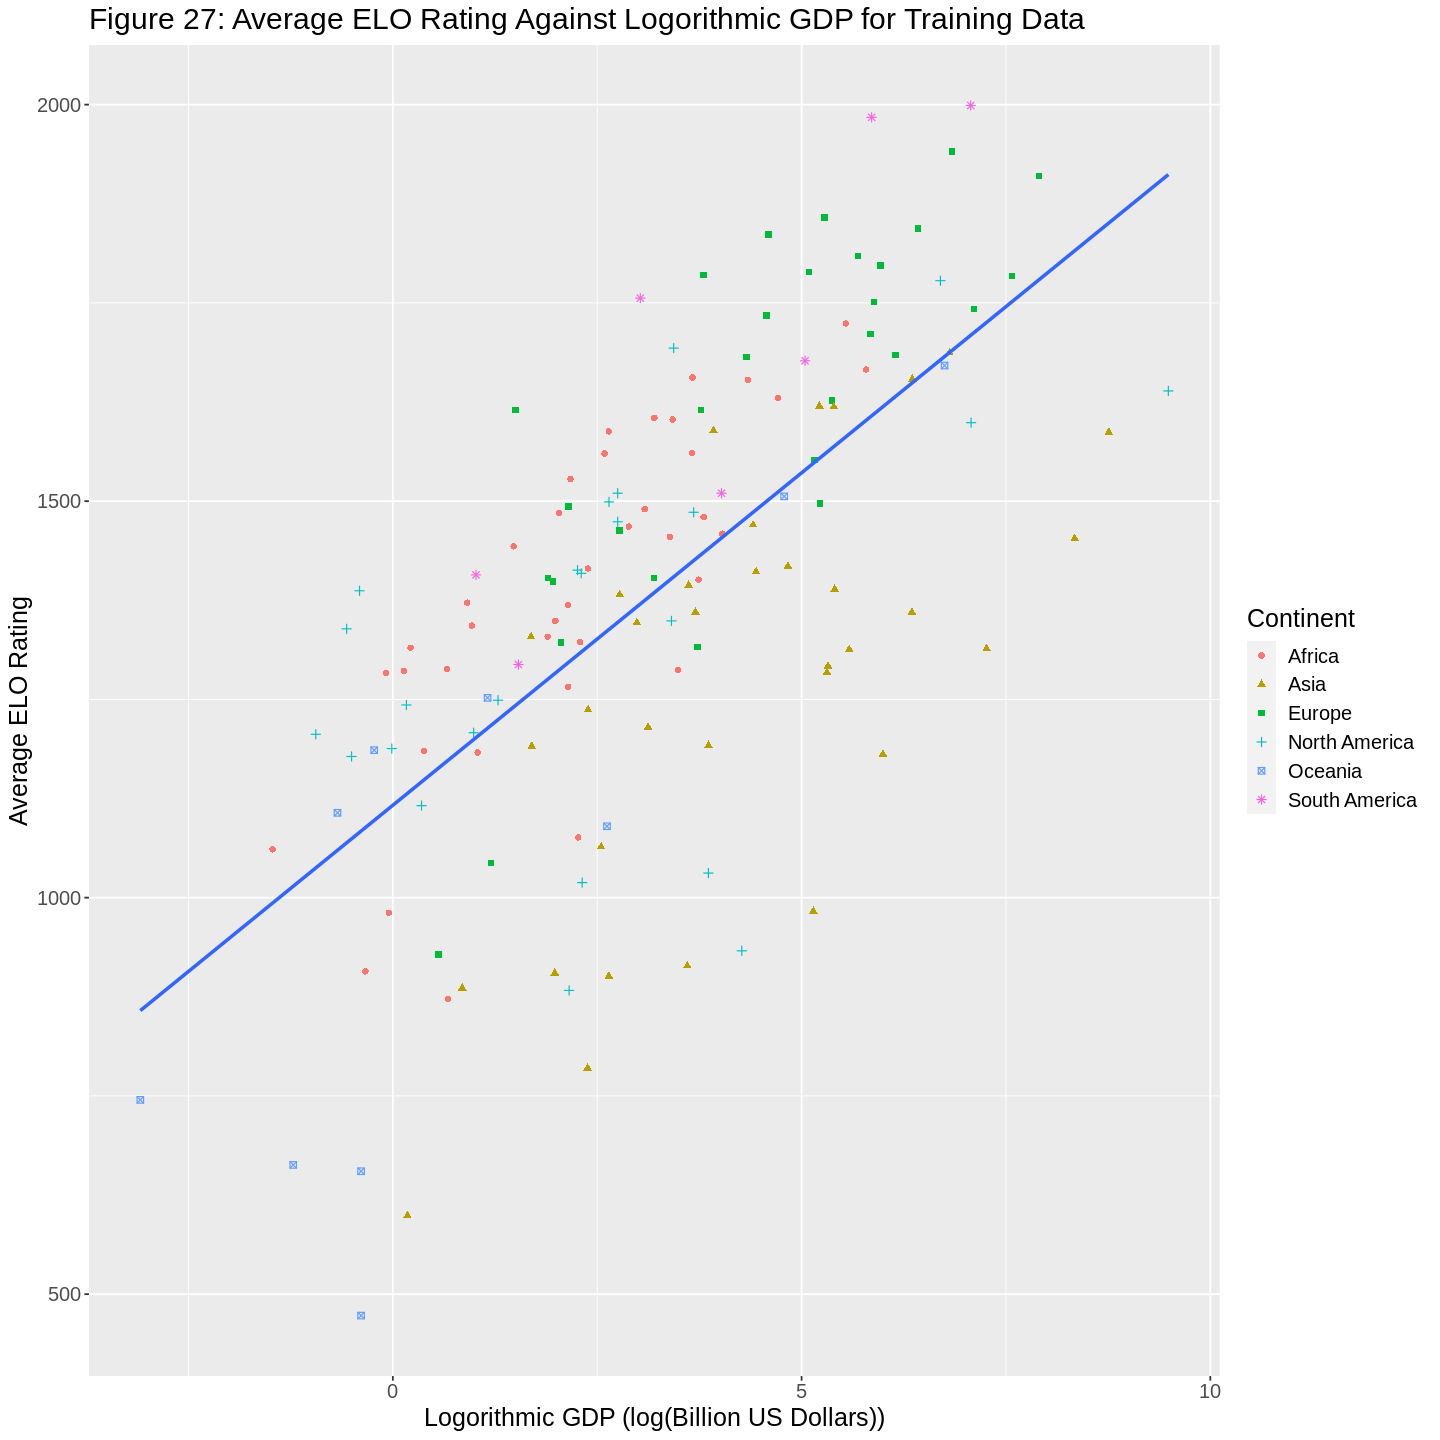

In [24]:
options(repr.plot.width = 12, repr.plot.height = 12)

# Visualizing the linear regression on the training data between average ELO Rating and logarithm GDP
soccer_plot_lm_training <- ggplot(soccer_training, aes(x = log_Mean_GDP, y = average_rating)) +
    geom_point(aes(color = Continent, shape = Continent)) +
    xlab("Logorithmic GDP (log(Billion US Dollars))") +
    ylab("Average ELO Rating") +
    geom_smooth(method = "lm", se = FALSE) +
    ggtitle("Figure 27: Average ELO Rating Against Logorithmic GDP for Training Data") +
    theme(text = element_text(size = 15))

soccer_plot_lm_training

From `Figure 27`, the linear line produced by the regression fits the training data reasonably considering the data points are a weak positive linear relationship. There are about the same amount of data points above and below the line. Some data points of Oceania are far from the line of best fit, which is expected considering previous . 

The model of the training data is tested with the testing data and the RMSPE will be determined to evaluate the accuracy of the fit.

In [25]:
# Predicting results for the testing data based on the 
soccer_mult_test_results <- soccer_fit |>
    predict(soccer_testing) |>
    bind_cols(soccer_testing) |>
    metrics(truth = average_rating, estimate = .pred)

# Obtaining the RMSPE from the testing data
lm_rmspe <- soccer_mult_test_results |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

lm_rmspe

[1] 236.8279

The RMSPE is 236.828, which is reasonable given the size and range of the ELO rating. Compared to the KNN regression with a RMSPE value of 237.9049143, the linear regression has a better fit. It also has the advantage of being more useful for future predictions. It clearly shows that the ELO rating increases with GDP, which is ambiguous in the KNN-regression plots.

The visualization of the testing data against the model developed by the training data:

`geom_smooth()` using formula 'y ~ x'



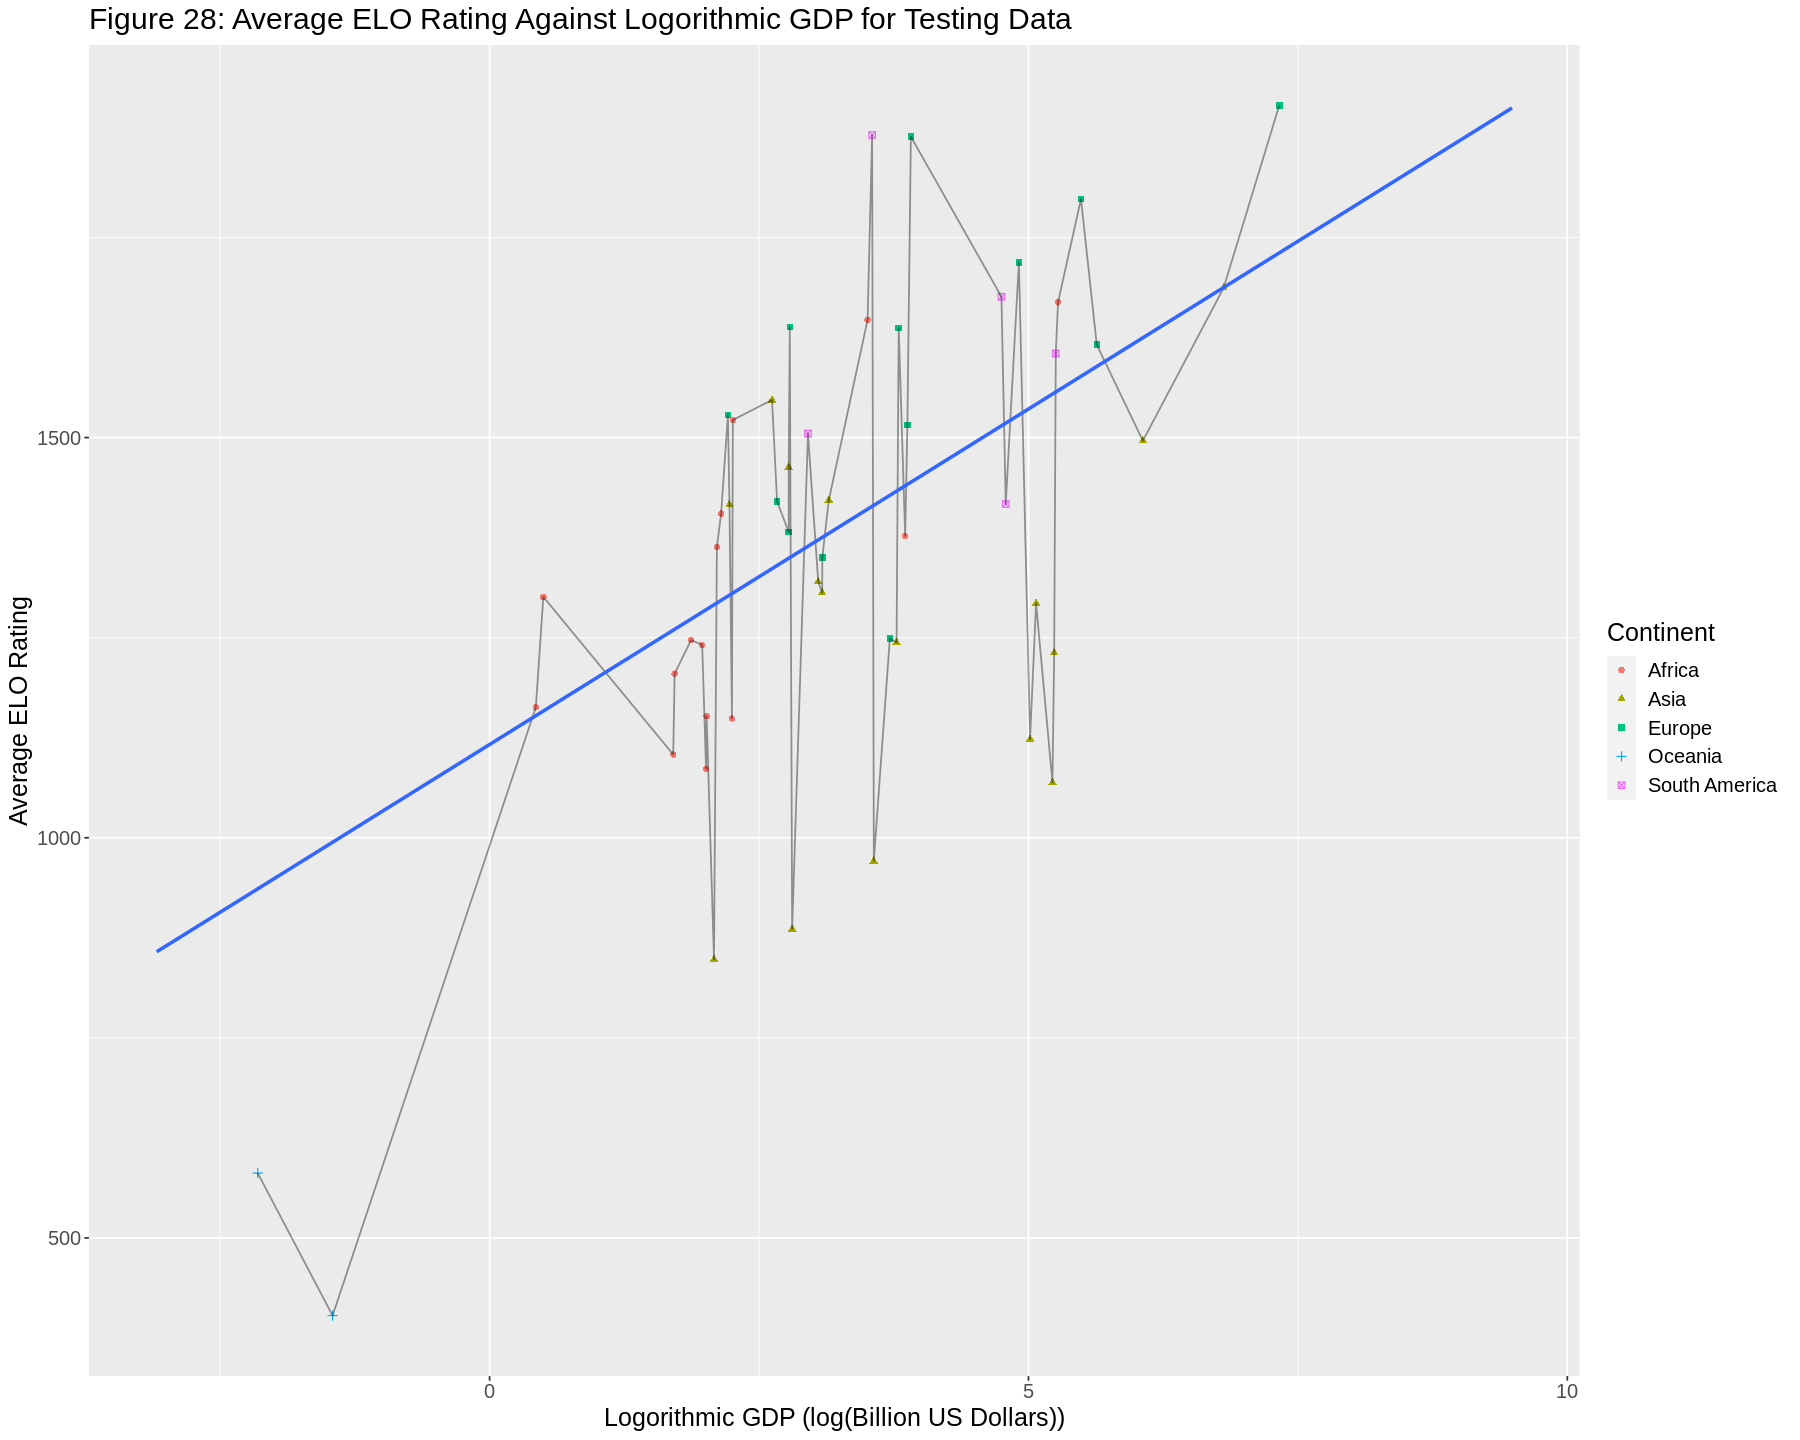

In [26]:
options(repr.plot.width = 15, repr.plot.height = 12)

# Visualizing the linear regression on the training data between average ELO Rating and logarithm GDP
soccer_plot_lm_testing <- ggplot(soccer_testing, aes(x = log_Mean_GDP, y = average_rating)) +
    geom_point(aes(color = Continent, shape = Continent)) +
    geom_line(aes(x=log_Mean_GDP, y=average_rating), , alpha = 0.4) +
    xlab("Logorithmic GDP (log(Billion US Dollars))") +
    ylab("Average ELO Rating") +
    geom_smooth(data = soccer_training, aes(x = log_Mean_GDP, y = average_rating), method = "lm", se = FALSE) +
    ggtitle("Figure 28: Average ELO Rating Against Logorithmic GDP for Testing Data") +
    theme(text = element_text(size = 15))

soccer_plot_lm_testing

`Figure 28`: As with before, the Oceania testing data points are affecting the validity of the linear fit on the testing data. The linear fit goes through the middle of these testing data. However, the testing data is too small and has too weak a relationship.

The RMSPE is reasonable but perhaps there is a better way to include more variables to this regression.

The testing data is too little to make a valid conclusion but the investigation is limited due to there only being 190 countries in total. Our data already maximizes the size of the testing/training set.

## 6. Discussion <a name="discussion"></a>

The regressions performed on the dataset containing the World Football ELO Rating and the GDP dataset from the IMF suggest that there is a positive logarithmic relationship between the total GDP of a country and the average FIFA Official ELO rating. First, the datasets are wrangled and potential response variables were determined, such as success percentage, 3 points per win, and ELO rating. After some visualization, a potential correlation between the total GDP and GDP Per Capita and the average ELO rating was investigated. When the x-axis is scaled logarithmically, the graphs indicate a weak linear positive relationship.

In order to answer our question, "Does the GDP affect a nation's soccer team performance", we performed a KNN-regression with the predictor variable of log(GDP) and log(GDP Per Capita), with the response variable of average ELO rating. Our model minimizes the RMSE value with a k value of 24 and yields a RSMPE value of 237.9049143 with the testing data. After graphing the KNN-regression with the training data, it is clear that the model is overfitting. Given that some datapoints are outside the range, it is difficult to interpret whether the data points are correlated.

A linear regression is then performed by choosing the most linear graph, which is between the logarithm of the total GDP and the average ELO rating. The line of best fit of the training data was determined to be $83.83*$ log(`GDP`) $+ 1116.56 = $ `average_rating`. The model yields a RMSPE value of 236.827903423546, which is better than the KNN regression. As well, it clearly indicates a positive correlation between the log(GDP) and average ELO rating, although the testing data was spread out when graphed against the linear model. Therefore, the linear regression is more advantageous as a predictor than the KNN regression in that sense.

Some factors that affected the models were the limitation in data amount and continents. From the visualization, it is clear that Oceania was an outlier in these graphs and negatively affected the accuracy of the models. If there was a way to obtain more data for our report, it would be reasonable to perform regressions on each continents seperately.


## 7. Conclusion and Future Questions <a name="conclusion"></a>

We can see that GDP per capita has a weak positive relationship with average ELO ratings. From these findings, we can come to the consensus that a country's GDP Per Capita has little impact on the performance of their national soccer team. By using GDP, we also can take away that players that come from a richer country will recieve a higher pay, along with better facilities to play the sport.

This was expected, as soccer is a game with a premise that is easy for just about anyone. Given the universality of the game, it isn't surprising to see such  weak and general results. Though, it is still fair to say that countries with an extremely low GDP per capita do not fare well in the sport.

The driving reason why we decided to choose GDP as a variable to begin with is that we wanted to investigate a possibility of bias, as a richer country would have access to better resources that could ultimately improve their team's overall performance. Since this is not the case as per our results, this opens the conversation up to question other factors that contribute to soccer success. If the economic status of a country doesn't affect a country's soccer team's performance, then what does?

Instead of looking at the financial aspect, perhaps we can find more information within the demographics of the players or even the citizens of that country. Some other potential variables that could form a relationship with ELO performance could be national happiness ratings, national TV soccer viewership, how educated a nation is, and geographic location. 

Though the results may have not been as prominent as one may expect, it is still important to investigate. The results of this project attest to the popularity of the sport. The lack of relationship proves that even the poorest countries in the world can conquer the sport, which allow us believe that the level of biases are to a minimum. The evenness of our findings prove to us that, when it comes to international soccer, we are all on the same playing field.

## 8. References <a name="references"></a>


Continents according to our world in Data. Our World in Data. Retrieved December 1, 2022, from
https://ourworldindata.org/grapher/continents-according-to-our-world-in-data

International Monetary Fund. (n.d.). World Economic Outlook (October 2022). International Monetary Fund - Homepage. Retrieved November 20, 2022, from https://www.imf.org/external/datamapper/datasets/WEO 


Men's Ranking. FIFA World Ranking. Retrieved December 1, 2022, from https://www.fifa.com/fifa-world-ranking/men?dateId=id13792

Men's Ranking Procedures. FIFA World Ranking. Retrieved December 1, 2022, from https://www.fifa.com/fifa-world-ranking/procedure-men

Schaal, M. (2019, December 30). World Cup All-Time Tables (including Qualifying). World Cup all-time tables (including qualifying). Retrieved December 1, 2022, from https://www.rsssf.org/tablesw/wcq-records.html 

World Football Elo Ratings. ELO Rating. Retreived December 1, 2022, from https://www.eloratings.net/